In [1]:
using Pkg
Pkg.activate("..")
Pkg.add("PyPlot")
using Clapeyron, PyCall, CSV, Tables
PyDict(pyimport("matplotlib")["rcParams"])["font.sans-serif"] = ["calibri"]
import PyPlot; const plt = PyPlot

    Fetching: [=============

PyPlot

### Figure 1

In this figure, we'll be looking at the VLE envelope for water obtained using different versions of the cubic equation of state.

In [49]:
# Generating the models
model1 = RK(["water"])
model2 = PR(["water"])
model3 = PR(["water"];alpha=TwuAlpha)
model4 = PR(["water"];alpha=TwuAlpha,translation=RackettTranslation)

# Concatenating them into one list
models = [model1,model2,model3,model4];

In [50]:
# Obtaining all of their critical points
crit = crit_pure.(models);

In [51]:
# Obtaining the saturation curve
T = []
p = []
v_l = []
v_v = []
for i ∈ 1:4
    append!(T,[range(285,crit[i][1],length=300)])
    sat = saturation_pressure.(models[i],T[i])
    append!(p,[[sat[i][1] for i ∈ 1:300]])
    append!(v_l,[[sat[i][2] for i ∈ 1:300]])
    append!(v_v,[[sat[i][3] for i ∈ 1:300]])
    println(i)
end

1
2
3
4


In [52]:
T_exp = [300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
647.096]

p_exp = [0.0035368
0.010546
0.027188
0.062194
0.12885
0.24577
0.4373
0.73367
1.1709
1.7905
2.6392
3.769
5.2369
7.1062
9.448
12.345
15.901
20.265
22.064]

ρ_l_exp = [55.315
54.919
54.371
53.698
52.918
52.038
51.064
49.994
48.824
47.545
46.145
44.603
42.889
40.956
38.725
36.048
32.577
26.729
17.873728]

ρ_v_exp = [0.0014204
0.0039778
0.0096808
0.021014
0.041537
0.076014
0.13055
0.21276
0.33209
0.50035
0.73265
1.0491
1.478
2.062
2.872
4.0434
5.9009
9.8331
17.873728]

19-element Vector{Float64}:
  0.0014204
  0.0039778
  0.0096808
  0.021014
  0.041537
  0.076014
  0.13055
  0.21276
  0.33209
  0.50035
  0.73265
  1.0491
  1.478
  2.062
  2.872
  4.0434
  5.9009
  9.8331
 17.873728

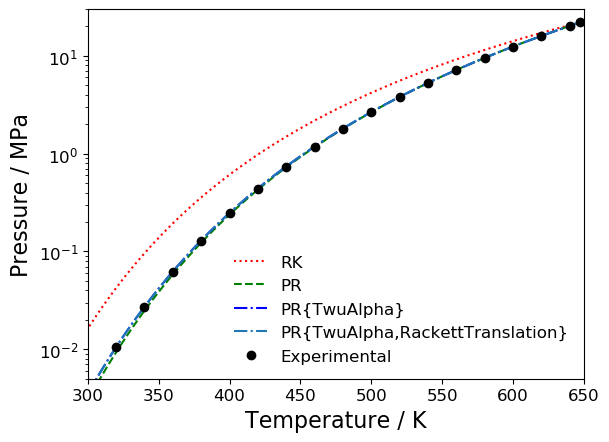

In [54]:
# Plotting p-T curve
plt.semilogy(T[1],p[1] ./1e6,label="RK",linestyle=":",color="r")
plt.semilogy(T[2],p[2] ./1e6,label="PR",linestyle="--",color="g")
plt.semilogy(T[3],p[3] ./1e6,label="PR{TwuAlpha}",linestyle="-.",color="b")
plt.semilogy(T[4],p[4] ./1e6,label="PR{TwuAlpha, RackettTranslation}",linestyle="-.")
plt.semilogy(T_exp,p_exp,label="Experimental",marker="o",linestyle="",color="k")
# Create a legend of all the existing plots using their labels as names
plt.legend(loc="lower right",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([300,650])
plt.ylim([5e-3,3e1])
plt.savefig("water_psat_cubics.pdf")

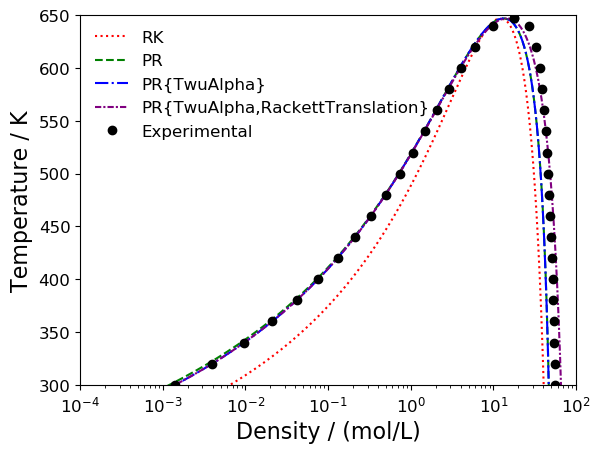

In [56]:
# Plotting rho-T envelope
plt.semilogx(1e-3 ./v_l[1],T[1],label="RK",linestyle=":",color="r")
plt.semilogx(1e-3 ./v_v[1],T[1],label="",linestyle=":",color="r")
plt.semilogx(1e-3 ./v_l[2],T[2],label="PR",linestyle="--",color="g")
plt.semilogx(1e-3 ./v_v[2],T[2],label="",linestyle="--",color="g")
plt.semilogx(1e-3 ./v_l[3],T[3],label="PR{TwuAlpha}",linestyle="-.",color="b")
plt.semilogx(1e-3 ./v_v[3],T[3],label="",linestyle="-.",color="b")
plt.semilogx(1e-3 ./v_l[4],T[4],label="PR{TwuAlpha, RackettTranslation}",linestyle=(0, (3, 1, 1, 1)),color="purple")
plt.semilogx(1e-3 ./v_v[4],T[4],label="",linestyle=(0, (3, 1, 1, 1)),color="purple")
plt.semilogx(ρ_l_exp,T_exp,label="Experimental",marker="o",linestyle="",color="k")
plt.semilogx(ρ_v_exp,T_exp,label="",marker="o",linestyle="",color="k")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("Density / (mol/L)",fontsize=16)
plt.ylabel("Temperature / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([1e-4,1e2])
plt.ylim([300,650])
plt.savefig("water_vle_cubics.pdf")

## Figure 2
Carbon dioxide+carbon monoxide

In [499]:
model1 = PR(["carbon monoxide","carbon dioxide"])
model2 = PR(["carbon monoxide","carbon dioxide"];alpha=BMAlpha)
model3 = PR(["carbon monoxide","carbon dioxide"];mixing=KayRule)
model4 = VTPR(["carbon monoxide","carbon dioxide"])
model5 = VTPR(["carbon monoxide","carbon dioxide"];alpha=BMAlpha)

models = [model1,model2,model3,model4,model5];

In [500]:
T = 218.15
x1 = range(1e-5,0.518,length=400)
x2 = range(1e-5,0.512,length=400)
x3 = range(1e-5,0.655,length=400)
x4 = range(1e-5,0.575,length=400)
x5 = range(1e-5,0.57,length=400)
x = [x1,x2,x3,x4,x5]
X1 = Clapeyron.FractionVector.(x1)
X2 = Clapeyron.FractionVector.(x2)
X3 = Clapeyron.FractionVector.(x3)
X4 = Clapeyron.FractionVector.(x4)
X5 = Clapeyron.FractionVector.(x5)
X = [X1,X2,X3,X4,X5]

y = []
p = []
for i ∈ 1:5
    bub = []
    v0 =[]
    for j ∈ 1:400
        if j==1
            append!(bub, [bubble_pressure(models[i],T,X[i][j])])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        else
            append!(bub, [bubble_pressure(models[i],T,X[i][j];v0=v0)])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        end
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:400],reverse(x[i]))])
    append!(p,[append!([bub[i][1] for i ∈ 1:400],[bub[i][1] for i ∈ 400:-1:1])])
end

In [501]:
p_exp = [552500
766300
1359500
2220300
3224900
4161200
5022400
5877300
6840800
7627100
8262000
9370500
10025000
10873500
11534400
12233200
12976100
13847500
14306900
14519400
14631500]

x_exp = [0
0.0041
0.0169
0.0364
0.0595
0.0815
0.1024
0.1231
0.1461
0.1678
0.1858
0.2183
0.2394
0.2698
0.2953
0.3255
0.3606
0.416
0.4588
0.4924
0.5117]

y_exp = [0
0.2352
0.5435
0.6975
0.7653
0.7988
0.816
0.8248
0.8285
0.8291
0.8268
0.8194
0.8129
0.802
0.7906
0.7752
0.7513
0.7112
0.6748
0.646
0.6181];

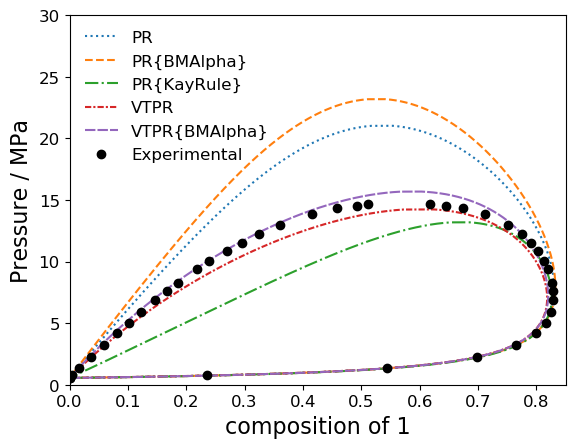

In [502]:
plt.plot(y[1],p[1]./1e6,label="PR",linestyle=":")
plt.plot(y[2],p[2]./1e6,label="PR{BMAlpha}",linestyle="--")
plt.plot(y[3],p[3]./1e6,label="PR{KayRule}",linestyle="-.")
plt.plot(y[4],p[4]./1e6,label="VTPR",linestyle=(0, (3, 1, 1, 1)))
plt.plot(y[5],p[5]./1e6,label="VTPR{BMAlpha}",linestyle=(0, (5, 1)))
plt.plot(y_exp,p_exp./1e6,label="Experimental",marker="o",linestyle="",color="k")
plt.plot(x_exp,p_exp./1e6,label="",marker="o",linestyle="",color="k")
plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,0.85])
plt.ylim([0,30])
plt.savefig("CO2+CO_alpha.pdf")

## Figure 3
Methanol+cyclohexane

In [503]:
model1 = SRK(["methanol","benzene"])
model2 = SRK(["methanol","benzene"];mixing=HVRule,activity=UNIFAC)
model3 = SRK(["methanol","benzene"];mixing=MHV2Rule,activity=UNIFAC)
model4 = SRK(["methanol","benzene"];mixing=MHV2Rule,activity=COSMOSAC02)
model5 = PSRK(["methanol","benzene"];activity=PSRKUNIFAC)

models = [model1,model2,model3,model4,model5];

In [504]:
T = 433.15
x = range(1e-5,1-1e-5,length=200)
X = Clapeyron.FractionVector.(x)

y = []
p = []
for i ∈ 1:5
    bub = []
    v0 =[]
    for j ∈ 1:200
        println(j)
        if j==1
            append!(bub, [bubble_pressure(models[i],T,X[j])])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        else
            append!(bub, [bubble_pressure(models[i],T,X[j];v0=v0)])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        end
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:200],reverse(x))])
    append!(p,[append!([bub[i][1] for i ∈ 1:200],[bub[i][1] for i ∈ 200:-1:1])])
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [505]:
p_exp = [706713
961818
1123850
1301040
1540290
1685770
1761620
1804360
1844340
1831930
1796080
1734030]

y_exp = [0
0.2719
0.389
0.4873
0.5965
0.6645
0.7129
0.7487
0.8328
0.892
0.9287
1]

x_exp = [0
0.0483
0.0943
0.1589
0.2967
0.4449
0.5721
0.6775
0.8461
0.9176
0.9509
1];

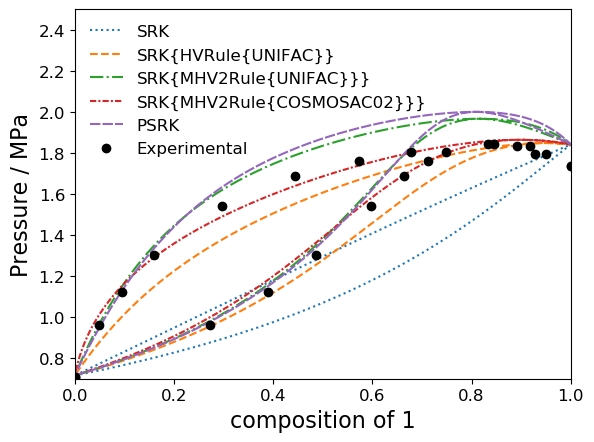

In [506]:
plt.plot(y[1],p[1]./1e6,label="SRK",linestyle=":")
plt.plot(y[2],p[2]./1e6,label="SRK{HVRule{UNIFAC}}",linestyle="--")
plt.plot(y[3],p[3]./1e6,label="SRK{MHV2Rule{UNIFAC}}}",linestyle="-.")
plt.plot(y[4],p[4]./1e6,label="SRK{MHV2Rule{COSMOSAC02}}}",linestyle=(0, (3, 1, 1, 1)))
plt.plot(y[5],p[5]./1e6,label="PSRK",linestyle=(0, (5, 1)))
plt.plot(y_exp,p_exp./1e6,label="Experimental",marker="o",linestyle="",color="k")
plt.plot(x_exp,p_exp./1e6,label="",marker="o",linestyle="",color="k")
plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0.7,2.5])
plt.xlim([0,1])
plt.savefig("MeOH_benzene_mixing.pdf")

## Figure 4

In [44]:
model1 = SRK(["pentane"])
model2 = SRK(["pentane"];idealmodel=JobackIdeal)
model3 = JobackIdeal(["pentane"])
model4 = GERG2008(["pentane"])
model5 = CKSAFT(["pentane"];idealmodel=WalkerIdeal)
model6 = SAFTgammaMie(["pentane"];idealmodel=ReidIdeal)
models = [model1,model2,model3,model4,model5,model6];

In [45]:
p = 5e6
T = range(450,580,length=200)
Cp = []

for i=1:6
    append!(Cp,[isobaric_heat_capacity.(models[i],p,T)])
end

In [46]:
T_exp = [450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570]

Cp_exp = [241.68
247.53
254.38
262.63
272.97
286.52
305.32
332.89
373.34
418.96
429.35
391.95
348.08
315.69
293.51
278.11
267.07
258.94
252.82
248.12
244.46
241.6
239.36
237.59
236.21];

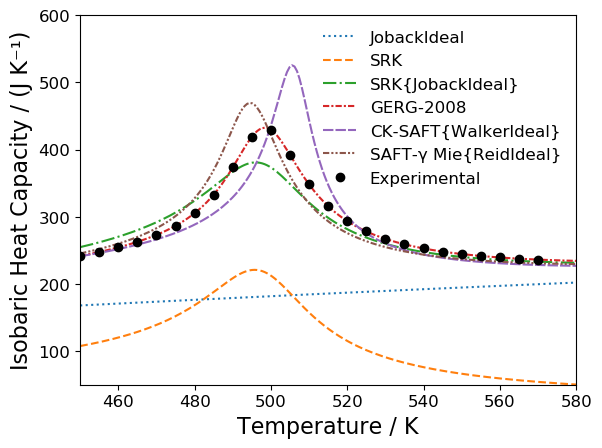

In [48]:
plt.plot(T,Cp[3],label="JobackIdeal",linestyle=":")
plt.plot(T,Cp[1],label="SRK",linestyle="--")
plt.plot(T,Cp[2],label="SRK{JobackIdeal}",linestyle="-.")
plt.plot(T,Cp[4],label="GERG-2008",linestyle=(0, (3, 1, 1, 1)))
plt.plot(T,Cp[5],label="CK-SAFT{WalkerIdeal}",linestyle=(0, (5, 1)))
plt.plot(T,Cp[6],label="SAFT-γ Mie{ReidIdeal}",linestyle=(0, (3, 1, 1, 1, 1, 1)))
plt.plot(T_exp,Cp_exp,label="Experimental",marker="o",linestyle="",color="k")
plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Isobaric Heat Capacity / (J K⁻¹)",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([450,580])
plt.ylim([50,600])
plt.savefig("pentane_cp.pdf")

## Figure 5"

In [24]:
model1 = PR(["carbon dioxide"];idealmodel=WalkerIdeal,alpha=BMAlpha)
model2 = SPUNG(["carbon dioxide"])
model3 = BACKSAFT(["carbon dioxide"];idealmodel=WalkerIdeal)
model4 = SAFTVRMie(["carbon dioxide"])
model5 = SAFTVRMie(["carbon dioxide"];idealmodel=WalkerIdeal)
models = [model1,model2,model3,model4,model5];

In [37]:
p = 5e6
T = range(250,400,length=400)
μJT = []

for i=1:5
    append!(μJT,[joule_thomson_coefficient.(models[i],p,T)].*1e6)
end

In [38]:
T_exp = [250
257
264
271
278
285
287.43
287.43
292
299
306
313
320
327
334
341
348
355
362
369
376
383
390
397]
μJT_exp = [0.015208
0.084006
0.17542
0.30268
0.49423
0.82833
1.0195
11.974
11.512
10.8
10.141
9.5403
8.9931
8.4931
8.0344
7.6124
7.2234
6.8638
6.5305
6.2211
5.9331
5.6646
5.4137
5.179];

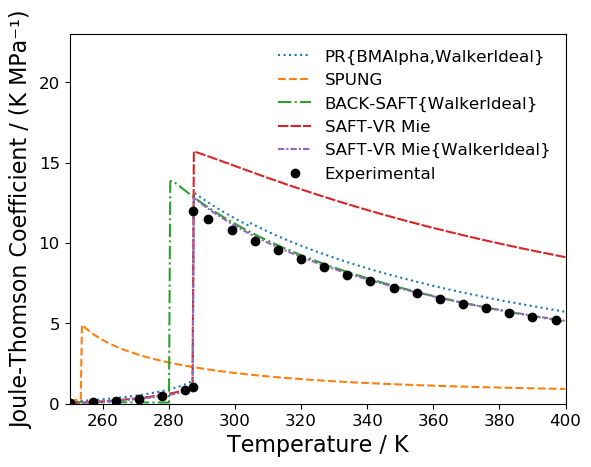

In [39]:
plt.plot(T,μJT[1],label="PR{BMAlpha, WalkerIdeal}",linestyle=":")
plt.plot(T,μJT[2],label="SPUNG",linestyle="--")
plt.plot(T,μJT[3],label="BACK-SAFT{WalkerIdeal}",linestyle="-.")
plt.plot(T,μJT[4],label="SAFT-VR Mie",linestyle=(0, (5, 1)))
plt.plot(T,μJT[5],label="SAFT-VR Mie{WalkerIdeal}",linestyle=(0, (3, 1, 1, 1)))

plt.plot(T_exp,μJT_exp,label="Experimental",marker="o",linestyle="",color="k")
plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Joule-Thomson Coefficient / (K MPa⁻¹)",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([250,400])
plt.ylim([0,23])
plt.savefig("CO2_JT.pdf")

## Figure 6

In [53]:
model1 = ogSAFT(["methanol"])
model2 = CKSAFT(["methanol"])
model3 = sCKSAFT(["methanol"])
model4 = softSAFT(["methanol"])
model5 = CPA(["methanol"])
model6 = PCSAFT(["methanol"])
model7 = SAFTVRMie(["methanol"])

models = [model1,model2,model3,model4,model5,model6,model7];

In [54]:
crit = crit_pure.(models)

7-element Vector{Tuple{Float64, Float64, Float64}}:
 (591.170225309955, 1.9605469531798944e7, 9.764942054422549e-5)
 (544.477770020478, 1.2402303998950405e7, 0.00011844615543016827)
 (528.6900553333744, 1.0335200519512538e7, 0.00011963530141953472)
 (541.2984338722576, 1.0864337929537997e7, 0.00012558827409268506)
 (538.2329369300235, 1.1144476193066003e7, 0.00012214940950934573)
 (531.5254102889758, 1.0654986682081942e7, 0.00012323234980900793)
 (524.1486987753945, 9.62674306188001e6, 0.00013689859977767418)

In [425]:
T = []
p = []
v_l = []
v_v = []
for i ∈ 1:7
    append!(T,[range(400,crit[i][1],length=100)])
    sat = saturation_pressure.(models[i],T[i])
    append!(p,[[sat[i][1] for i ∈ 1:100]])
    append!(v_l,[[sat[i][2] for i ∈ 1:100]])
    append!(v_v,[[sat[i][3] for i ∈ 1:100]])
    println(i)
end

1
2
3
4
5
6
7


In [49]:
T_exp = [400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
512.6]

ρ_l_exp = [21.178
20.973
20.761
20.542
20.315
20.079
19.834
19.579
19.313
19.034
18.741
18.432
18.106
17.759
17.388
16.989
16.553
16.071
15.524
14.88
14.092
13.118
11.689
8.6]

ρ_v_exp = [0.27259
0.31179
0.35583
0.40525
0.46071
0.52289
0.59256
0.67055
0.75766
0.85465
0.96219
1.0809
1.2115
1.3555
1.5154
1.6969
1.9102
2.1742
2.5083
2.905
3.4293
4.1468
5.1706
8.6];

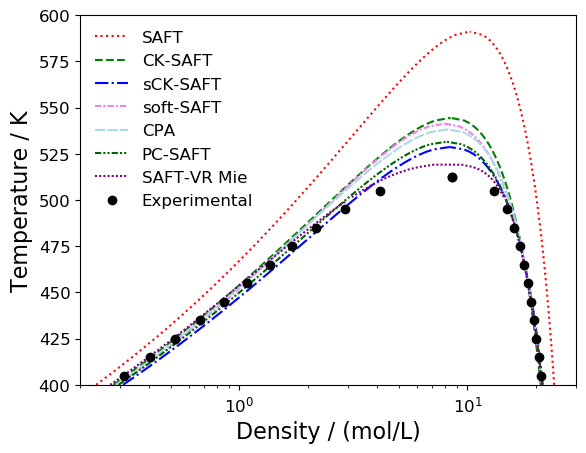

In [430]:
plt.semilogx(1e-3 ./v_l[1],T[1],label="SAFT",linestyle=":",color="r")
plt.semilogx(1e-3 ./v_v[1],T[1],label="",linestyle=":",color="r")
plt.semilogx(1e-3 ./v_l[2],T[2],label="CK-SAFT",linestyle="--",color="g")
plt.semilogx(1e-3 ./v_v[2],T[2],label="",linestyle="--",color="g")
plt.semilogx(1e-3 ./v_l[3],T[3],label="sCK-SAFT",linestyle="-.",color="b")
plt.semilogx(1e-3 ./v_v[3],T[3],label="",linestyle="-.",color="b")
plt.semilogx(1e-3 ./v_l[4],T[4],label="soft-SAFT",linestyle=(0, (3, 1, 1, 1)),color="violet")
plt.semilogx(1e-3 ./v_v[4],T[4],label="",linestyle=(0, (3, 1, 1, 1)),color="violet")
plt.semilogx(1e-3 ./v_l[5],T[5],label="CPA",linestyle=(0, (5, 1)),color="lightblue")
plt.semilogx(1e-3 ./v_v[5],T[5],label="",linestyle=(0, (5, 1)),color="lightblue")
plt.semilogx(1e-3 ./v_l[6],T[6],label="PC-SAFT",linestyle=(0, (3, 1, 1, 1, 1, 1)),color="darkgreen")
plt.semilogx(1e-3 ./v_v[6],T[6],label="",linestyle=(0, (3, 1, 1, 1, 1, 1)),color="darkgreen")
plt.semilogx(vcat(1e-3 ./v_l[7][1:end-4],1e-3 ./reverse(v_v[7][1:end-4])),vcat(T[7][1:end-4],reverse(T[7][1:end-4])),linestyle=(0, (1, 1)),label="SAFT-VR Mie",color="purple")

plt.semilogx(ρ_l_exp[2:2:end],T_exp[2:2:end],label="Experimental",marker="o",linestyle="",color="k")
plt.semilogx(ρ_v_exp[2:2:end],T_exp[2:2:end],label="",marker="o",linestyle="",color="k")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("Density / (mol/L)",fontsize=16)
plt.ylabel("Temperature / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([2e-1,3e1])
plt.ylim([400,600])
# plt.savefig("MeOH_vle_SAFT.pdf")

## Figure 7 
CO2+water

In [507]:
model1 = sCPA(["carbon dioxide","water"])
model2 = sCPA(["carbon dioxide","water"];cubicmodel=PR)
model3 = PCSAFT(["carbon dioxide","water"])
model4 = SAFTVRMie(["carbon dioxide","water"])

models = [model1,model2,model3,model4]

4-element Vector{EoSModel}:
 sCPA{BasicIdeal, RK{BasicIdeal, sCPAAlpha, NoTranslation, vdW1fRule}}("carbon dioxide", "water")
 sCPA{BasicIdeal, PR{BasicIdeal, sCPAAlpha, NoTranslation, vdW1fRule}}("carbon dioxide", "water")
 PCSAFT{BasicIdeal}("carbon dioxide", "water")
 SAFTVRMie{BasicIdeal}("carbon dioxide", "water")

In [508]:
function Clapeyron.x0_crit_pure(model::Clapeyron.sCPAModel,z=Clapeyron.SA[1.0])
    lb_v = Clapeyron.lb_volume(model,z)
    if isempty(model.params.epsilon_assoc.values[1,1])
        [2.0, log10(lb_v/0.3)]
    else
        [3.0, log10(lb_v/0.3)]
    end
end

In [509]:
pure = split_model(model1)

crit_pure(pure[2])

(681.2012211498861, 3.0473804375252653e7, 5.536699714404097e-5)

In [510]:
T = 323.15
x = range(1e-8,0.037,length=200)
X = Clapeyron.FractionVector.(x)

y = []
p = []
for i ∈ 1:4
    bub = []
    v0 =[]
    for j ∈ 1:200
        println(j)
        if j==1
            append!(bub, [bubble_pressure(models[i],T,X[j])])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        else
            append!(bub, [bubble_pressure(models[i],T,X[j];v0=v0)])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        end
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:200],reverse(x))])
    append!(p,[append!([bub[i][1] for i ∈ 1:200],[bub[i][1] for i ∈ 200:-1:1])])
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [511]:
p_exp = [1.089
2.98
7.406
10.021
12.973
17.533]

x_exp = [0.00333
0.00901
0.01829
0.02054
0.02141
0.02255]

y_exp = [0.97189
0.99493
0.9965
0.99597
0.99467
0.99386];

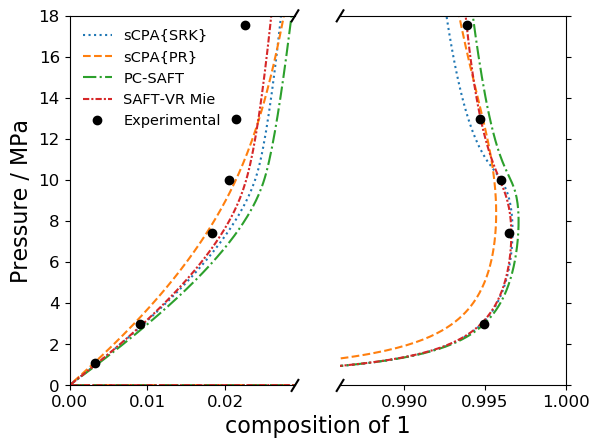

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [512]:
f,(ax,ax2) = plt.subplots(1,2,sharey=true, facecolor="w")

# plot the same data on both axes
ax.plot(y[1],p[1]./1e6,label="sCPA{SRK}",linestyle=":")
ax.plot(y[2],p[2]./1e6,label="sCPA{PR}",linestyle="--")
ax.plot(y[3],p[3]./1e6,label="PC-SAFT",linestyle="-.")
ax.plot(y[4],p[4]./1e6,label="SAFT-VR Mie",linestyle=(0, (3, 1, 1, 1)))
ax.plot(x_exp,p_exp,label="Experimental",marker="o",linestyle="",color="k")
ax2.plot(y[1],p[1]./1e6,label="",linestyle=":")
ax2.plot(y[2],p[2]./1e6,label="",linestyle="--")
ax2.plot(y[3],p[3]./1e6,label="",linestyle="-.")
ax2.plot(y[4],p[4]./1e6,label="",linestyle=(0, (3, 1, 1, 1)))
ax2.plot(y_exp,p_exp,label="",marker="o",linestyle="",color="k")

ax.set_xlim(0,0.029)
ax.set_ylim(0,18.)
ax2.set_xlim(0.986,1.)
ax2.set_ylim(0,18.)

# hide the spines between ax and ax2
ax.spines["right"].set_visible(false)
ax2.spines["left"].set_visible(false)
ax.yaxis.tick_left()
ax2.yaxis.tick_right()

d = 0.015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
ax.plot((1-d,1+d), (-d,+d), transform=ax.transAxes, color="k", clip_on=false)
ax.plot((1-d,1+d),(1-d,1+d), transform=ax.transAxes, color="k", clip_on=false)

ax2.plot((-d,+d), (1-d,1+d), transform=ax2.transAxes, color="k", clip_on=false)
ax2.plot((-d,+d), (-d,+d), transform=ax2.transAxes, color="k", clip_on=false)

ax.legend(loc="upper left",frameon=false,fontsize=10.5) 
ax.set_xlabel("composition of 1",fontsize=16)
ax.xaxis.set_label_coords(1.1, -0.08)
ax.set_ylabel("Pressure / MPa",fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)

plt.setp(ax.get_yticklabels(), fontsize=12);
plt.savefig("CO2+water_SAFT.pdf")

## Figure 8
water+ethanol

In [513]:
model1 = Wilson(["water","ethanol"];puremodel=PR)
model2 = NRTL(["water","ethanol"];puremodel=PR)
model3 = UNIQUAC(["water","ethanol"];puremodel=PR)
model4 = PR(["water","ethanol"];mixing=HVRule,activity=Wilson)
model5 = PR(["water","ethanol"];mixing=WSRule,activity=NRTL)
model6 = PR(["water","ethanol"];mixing=LCVMRule,activity=UNIQUAC)

models = [model1,model2,model3,model4,model5,model6]

6-element Vector{EoSModel}:
 Wilson{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}("water", "ethanol")
 NRTL{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}("water", "ethanol")
 UNIQUAC{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}("water", "ethanol")
 PR{BasicIdeal, PRAlpha, NoTranslation, HVRule{Wilson{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}}}("water", "ethanol")
 PR{BasicIdeal, PRAlpha, NoTranslation, WSRule{NRTL{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}}}("water", "ethanol")
 PR{BasicIdeal, PRAlpha, NoTranslation, LCVMRule{UNIQUAC{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}}}("water", "ethanol")

In [514]:
x = range(1e-5,1-1e-5,length=100)
X = Clapeyron.FractionVector.(x)
T = []
y = []

for j=1:6
    A = []
    B = []
    T0 = 351
    for i=1:100
        println(i)
        bub = bubble_temperature(models[j],1.0133e5,X[i];T0=T0)
        append!(A,bub[1])
        if j<=3
            append!(B,bub[2][1])
        else
            append!(B,bub[4][1])
        end
        T0 = deepcopy(A[i])
    end
    append!(A,reverse(A))
    append!(T,[A])
    append!(B,reverse(x))
    append!(y,[B])
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
4

In [515]:
x_exp = [0.001
0.01
0.03
0.08
0.13
0.18
0.26
0.36
0.46
0.56
0.66
0.76
0.86
0.919]

y_exp = [0.01
0.104
0.2442
0.399
0.48
0.5175
0.5545
0.5955
0.632
0.676
0.731
0.789
0.8645
0.9158]

T_exp = [372.96
371.25
366.05
360.6
358.05
356.52
355.2
354.2
353.33
352.75
352.25
351.75
351.43
351.45];

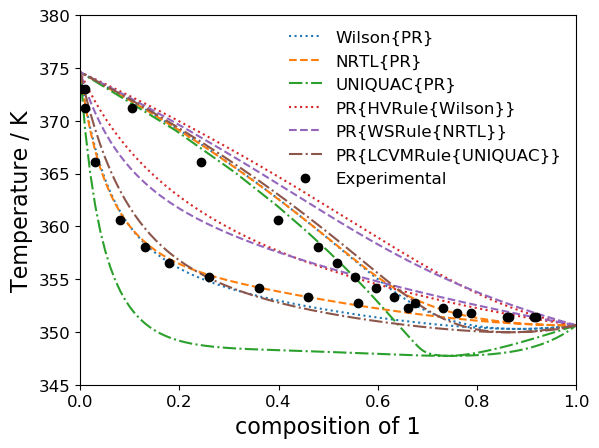

In [516]:
plt.plot(1 .-y[1],T[1],label="Wilson{PR}",linestyle=":")
plt.plot(1 .-y[2],T[2],label="NRTL{PR}",linestyle="--")
plt.plot(1 .-y[3],T[3],label="UNIQUAC{PR}",linestyle="-.")
plt.plot(1 .-y[4],T[4],label="PR{HVRule{Wilson}}",linestyle=":")
plt.plot(1 .-y[5],T[5],label="PR{WSRule{NRTL}}",linestyle="--")
plt.plot(1 .-y[6],T[6],label="PR{LCVMRule{UNIQUAC}}",linestyle="-.")
plt.plot(y_exp,T_exp,label="Experimental",marker="o",linestyle="",color="k")
plt.plot(x_exp,T_exp,label="",marker="o",linestyle="",color="k")
plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Temperature / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,1])
plt.ylim([345,380])
plt.savefig("EtOH_water_Txy.pdf")

## Figure 9
Ethanol+water

In [517]:
model1 = Wilson(["water","ethanol"];puremodel=SRK)
model2 = NRTL(["water","ethanol"];puremodel=PR)
model3 = UNIFAC(["water","ethanol"];puremodel=PCSAFT)
model4 = COSMOSACdsp(["water","ethanol"];puremodel=SAFTgammaMie)

models = [model1,model2,model3,model4]

4-element Vector{Clapeyron.ActivityModel}:
 Wilson{RK{BasicIdeal, SoaveAlpha, NoTranslation, vdW1fRule}}("water", "ethanol")
 NRTL{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}("water", "ethanol")
 UNIFAC{PCSAFT{BasicIdeal}}("water", "ethanol")
 COSMOSACdsp{SAFTgammaMie{BasicIdeal, SAFTVRMie{BasicIdeal}}}("water", "ethanol")

In [518]:
T = 423.15
x = range(1e-5,1-1e-5,length=200)
X = Clapeyron.FractionVector.(x)

y = []
p = []
for i ∈ 1:4
    println(i)
    v0 =[]
    bub = bubble_pressure.(models[i],T,X)
    append!(y,[append!([bub[i][2][1] for i ∈ 1:200],reverse(x))])
    append!(p,[append!([bub[i][1] for i ∈ 1:200],[bub[i][1] for i ∈ 200:-1:1])])
end

1
2
3
4


In [519]:
x_exp = [0.018
0.048
0.084
0.155
0.184
0.232
0.264
0.326
0.34
0.463
0.572
0.648
0.717
0.781
0.862
0.923
0.966]

y_exp = [0.159
0.288
0.367
0.438
0.458
0.49
0.503
0.528
0.535
0.6
0.658
0.704
0.749
0.797
0.862
0.919
0.961]

p_exp = [558470
627430
703260
779110
806680
827370
841160
841160
848050
896310
917000
930790
930790
958370
985950
985950
985950];

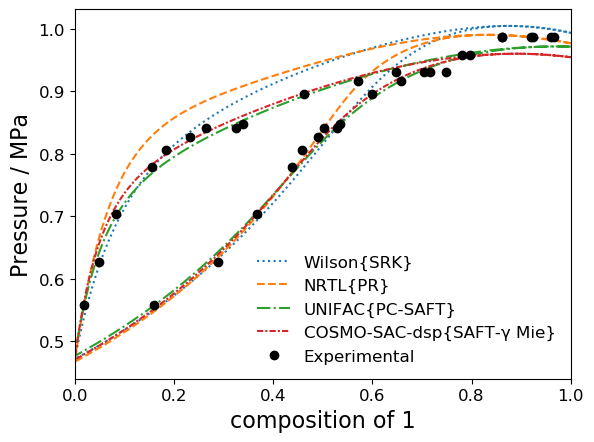

In [520]:
plt.plot(1 .-y[1],p[1]./1e6,label="Wilson{SRK}",linestyle=":")
plt.plot(1 .-y[2],p[2]./1e6,label="NRTL{PR}",linestyle="--")
plt.plot(1 .-y[3],p[3]./1e6,label="UNIFAC{PC-SAFT}",linestyle="-.")
plt.plot(1 .-y[4],p[4]./1e6,label="COSMO-SAC-dsp{SAFT-γ Mie}",linestyle=(0, (3, 1, 1, 1)))
plt.plot(y_exp,p_exp./1e6,label="Experimental",marker="o",linestyle="",color="k")
plt.plot(x_exp,p_exp./1e6,label="",marker="o",linestyle="",color="k")
plt.legend(loc="bottom right",frameon=false,fontsize=12) 
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim([0.7,2.5])
plt.xlim([0,1])
plt.savefig("EtOH_water_pxy.pdf")

## Figure X

In [61]:
model1 = GERG2008(["methane","butane","isobutane","pentane"])
model2 = PR(["methane","butane","isobutane","pentane"])
model3 = PCSAFT(["methane","butane","isobutane","pentane"])
model4 = SAFTgammaMie(["methane","butane","isobutane","pentane"])

models = [model1,model2,model3,model4]
x = [0.96611,0.01475,0.01527,0.00385]
x = x./sum(x)

4-element Vector{Float64}:
 0.9661293225864517
 0.014750295005900116
 0.01527030540610812
 0.0038500770015400306

In [62]:
p = []
T = []
Tcrit = [188.039,204.173,202.694,207.7]
Tmax = [267,265.5,267,267]
for j=1:4
    println(j)
#     crit = crit_mix(models[j],x)
    T1 = range(150,Tcrit[j],length=400)
    T2 = range(200,Tmax[j],length=400)
    T3 = range(Tmax[j],215,length=400)
    bub1 = []
    bub2 = []
    bub3 = []
    v1 = []
    v2 = []
    for i ∈ 1:400
        println(i)
        if i ==1
            append!(bub1,[bubble_pressure(models[j],T1[i],x)])
            v1 = [log10(bub1[i][2]),log10(bub1[i][3]),bub1[i][4][1],bub1[i][4][2],bub1[i][4][3],bub1[i][4][4]]
            append!(bub2,[dew_pressure(models[j],T2[i],x)])
            v2 = [log10(bub2[i][2]),log10(bub2[i][3]),bub2[i][4][1],bub2[i][4][2],bub2[i][4][3],bub2[i][4][4]]
        else
            append!(bub1,[bubble_pressure(models[j],T1[i],x;v0=v1)])
            v1 = [log10(bub1[i][2]),log10(bub1[i][3]),bub1[i][4][1],bub1[i][4][2],bub1[i][4][3],bub1[i][4][4]]
            append!(bub2,[dew_pressure(models[j],T2[i],x;v0=v2)])
            v2 = [log10(bub2[i][2]),log10(bub2[i][3]),bub2[i][4][1],bub2[i][4][2],bub2[i][4][3],bub2[i][4][4]]    
        end
    end

    v3 = deepcopy(v2)
    v3[2] = 1.1*v3[2]

    for i ∈ 1:400
#         println(i)
        if i ==1
            append!(bub3,[dew_pressure(models[j],T3[i],x;v0=v3)])
            v3 = [log10(bub3[i][2]),log10(bub3[i][3]),bub3[i][4][1],bub3[i][4][2],bub3[i][4][3],bub3[i][4][4]]
        else
            append!(bub3,[dew_pressure(models[j],T3[i],x;v0=v3)])
            v3 = [log10(bub3[i][2]),log10(bub3[i][3]),bub3[i][4][1],bub3[i][4][2],bub3[i][4][3],bub3[i][4][4]]
        end
    end

    p1 = [bub1[i][1] for i ∈ 1:400]
    p2 = [bub2[i][1] for i ∈ 1:400]
    p3 = [bub3[i][1] for i ∈ 1:400]
    
    A = []
    append!(A,p1)
    append!(A,reverse(p3))
    append!(A,reverse(p2))
    append!(p,[A])
    B = []
    append!(B,T1)
    append!(B,reverse(T3))
    append!(B,reverse(T2))
    append!(T,[B])
end

1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [63]:
T_exp = [263.7
265.3
266.1
267
267.8
268.3
268.2
268
267.4
266.4
264.9
262.8
259.9
255.9
249.7
241.9]

p_exp = [7.92
7.54
7.06
6.56
6.04
5.56
5.06
4.58
4.1
3.58
3.08
2.6
2.08
1.58
1.06
0.644];

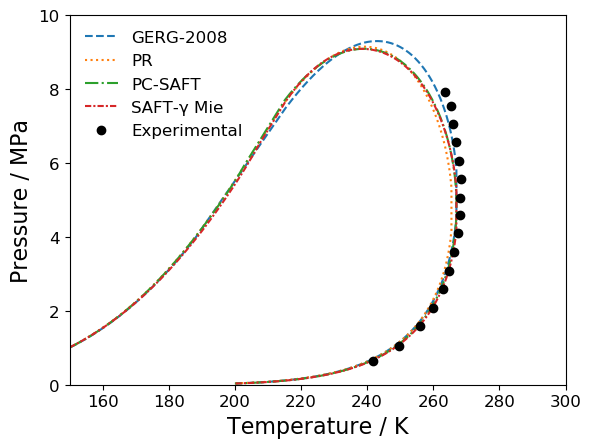

In [64]:
plt.plot(T[1],p[1]./1e6,label="GERG-2008",linestyle="--")
plt.plot(T[2],p[2]./1e6,label="PR",linestyle=":")
plt.plot(T[3],p[3]./1e6,label="PC-SAFT",linestyle="-.")
plt.plot(T[4],p[4]./1e6,label="SAFT-γ Mie",linestyle=(0, (3, 1, 1, 1)))

plt.plot(T_exp,p_exp,label="Experimental",marker="o",linestyle="",color="k")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.ylim([0.,10.])
plt.xlim([150,300])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("4_component_pT_isopleth.pdf")

## Figure Y

In [36]:
model1 = GERG2008(["methane","nitrogen","carbon dioxide","ethane","propane","butane","isobutane",
                   "pentane","isopentane","hexane","heptane","octane"])
model2 = SRK(["methane","nitrogen","carbon dioxide","ethane","propane","butane","isobutane",
                   "pentane","isopentane","hexane","heptane","octane"])
model3 = PCSAFT(["methane","nitrogen","carbon dioxide","ethane","propane","butane","isobutane",
                   "pentane","isopentane","hexane","heptane","octane"])
model4 = SAFTgammaMie(["methane","nitrogen","carbon dioxide","ethane","propane","butane","isobutane",
                   "pentane","isopentane","hexane","heptane","octane"])
models = [model1,model2,model3,model4]
x = [0.833482,0.056510,0.002840,0.075260,0.020090,0.005200,0.003050,0.001440,0.001200,0.000680,0.000138,0.000110]
sum(x)

0.9999999999999999

In [41]:
bubble_pressure(models[4],218,x)

(7.802527803432728e6, 7.753951677229731e-5, 7.754685154869388e-5, [0.833494235018222, 0.05651596426728643, 0.0028398489172916275, 0.07525004237581216, 0.02008556484769371, 0.005198450316838266, 0.003049231676351866, 0.0014394727674753066, 0.00119960497450522, 0.0006797097411772474, 0.00013793354520284071, 0.00010994155214327783])

In [45]:
p = []
T = []
Tcrit = [214,214,214,218]
Tmax = [272.5,272.5,273,273]
for j=1:4
    println(j)
#     crit = crit_mix(models[j],x)
    T1 = range(150,Tcrit[j],length=100)
    T2 = range(225,Tmax[j],length=100)
    T3 = range(Tmax[j],220,length=100)
    bub1 = []
    bub2 = []
    bub3 = []
    v1 = []
    v2 = []
    for i ∈ 1:100
        println(i)
        if i ==1
            append!(bub1,[bubble_pressure(models[j],T1[i],x)])
            v1 = [log10(bub1[i][2]),log10(bub1[i][3])]
            append!(v1,bub1[i][4])
            append!(bub2,[dew_pressure(models[j],T2[i],x)])
            v2 = [log10(bub2[i][2]),log10(bub2[i][3])]
            append!(v2,bub2[i][4])
        else
            append!(bub1,[bubble_pressure(models[j],T1[i],x;v0=v1)])
            v1 = [log10(bub1[i][2]),log10(bub1[i][3])]
            append!(v1,bub1[i][4])            
            append!(bub2,[dew_pressure(models[j],T2[i],x;v0=v2)])
            v2 = [log10(bub2[i][2]),log10(bub2[i][3])]
            append!(v2,bub2[i][4])  
        end
    end

    v3 = deepcopy(v2)
    v3[2] = 1.1*v3[2]

    for i ∈ 1:100
        println(i)
        if i ==1
            append!(bub3,[dew_pressure(models[j],T3[i],x;v0=v3)])
            v3 = [log10(bub3[i][2]),log10(bub3[i][3])]
            append!(v3,bub3[i][4])    
        else
            append!(bub3,[dew_pressure(models[j],T3[i],x;v0=v3)])
            v3 = [log10(bub3[i][2]),log10(bub3[i][3])]
            append!(v3,bub3[i][4])
        end
    end

    p1 = [bub1[i][1] for i ∈ 1:100]
    p2 = [bub2[i][1] for i ∈ 1:100]
    p3 = [bub3[i][1] for i ∈ 1:100]
    
    A = []
    append!(A,p1)
    append!(A,reverse(p3))
    append!(A,reverse(p2))
    append!(p,[A])
    B = []
    append!(B,T1)
    append!(B,reverse(T3))
    append!(B,reverse(T2))
    append!(T,[B])
end

1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [46]:
T_exp = [243.4
249.8
254.1
258.3
262.4
266.7
269.7
271.4
272.7
273.2
273.3
273.5
273.2
272.5
271.8
269.4
267.6
264.6
262.1
257.9
252.1
246.1
241.9
231.4
228.1
223.3
215.7]

p_exp = [2.0
3.4
5.0
7.0
9.9
14.7
20.1
24.6
30.6
35.1
40.0
45.0
50.0
55.0
60.1
66.2
71.4
75.3
80.2
84.8
88.5
91.4
92.3
90.5
88.7
82.8
74.2]./10;

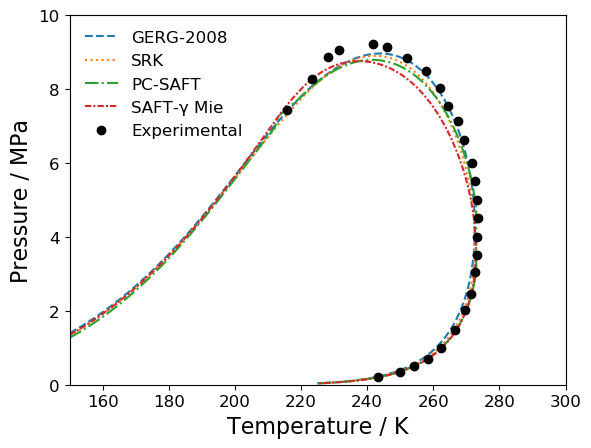

In [60]:
plt.plot(T[1],p[1]./1e6,label="GERG-2008",linestyle="--")
plt.plot(T[2],p[2]./1e6,label="SRK",linestyle=":")
plt.plot(vcat(T[3][1:99],T[3][102:end]),vcat(p[3][1:99],p[3][102:end])./1e6,label="PC-SAFT",linestyle="-.")
plt.plot(T[4],p[4]./1e6,label="SAFT-γ Mie",linestyle=(0, (3, 1, 1, 1)))
plt.plot(T_exp,p_exp,label="Experimental",marker="o",linestyle="",color="k")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.ylim([0.,10.])
plt.xlim([150,300])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("12_component_pT_isopleth.pdf")

## Figure Z
methanol+cyclohexane pT projection

In [106]:
model1 = SRK(["carbon dioxide","ethane"])
model2 = PSRK(["carbon dioxide","ethane"])
model3 = GERG2008(["carbon dioxide","ethane"])
model4 = SAFTVRMie(["carbon dioxide","ethane"])
model5 = sPCSAFT(["carbon dioxide","ethane"])

models = [model1,model2,model3,model4,model5]

5-element Vector{EoSModel}:
 RK{BasicIdeal, SoaveAlpha, NoTranslation, vdW1fRule}("carbon dioxide", "ethane")
 RK{BasicIdeal, SoaveAlpha, PenelouxTranslation, PSRKRule{PSRKUNIFAC{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}}}("carbon dioxide", "ethane")
 GERG2008("carbon dioxide", "ethane")
 SAFTVRMie{BasicIdeal}("carbon dioxide", "ethane")
 sPCSAFT{BasicIdeal}("carbon dioxide", "ethane")

In [107]:
p_eth = []
p_dec = []
T_eth = []
T_dec = []
for j=1:5
    pure = split_model(models[j])
    crit = crit_pure.(pure)
    T = []
    sat = []
    for i=1:2
        append!(T,[range(0.7*crit[i][1],crit[i][1],length=100)])
        append!(sat,[saturation_pressure.(pure[i],T[i])])
    end

    append!(p_eth,[[sat[1][i][1] for i ∈ 1:100]])
    append!(p_dec,[[sat[2][i][1] for i ∈ 1:100]])
    append!(T_eth,[T[1]])
    append!(T_dec,[T[2]])
end

In [108]:
x = range(1e-5,1-1e-5,length=100)
X = Clapeyron.FractionVector.(x)
T_crit = []
p_crit = []
for j=1:5
    T = []
    p = []
    println(j)
    v0 = []
    for i=1:100
        if i==1
            mix_crit = crit_mix(models[j],X[i]) 
            v0 = [log10(mix_crit[3]),mix_crit[1]]
#             if isnan(mix_crit[1])
#                 println(mix_crit[2])
#                 break
#             end
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        else
            mix_crit = crit_mix(models[j],X[i];v0=v0)
            v0 = [log10(mix_crit[3]),mix_crit[1]]
#             println(mix_crit[2])
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        end
        println(i)
    end
    append!(T_crit,[T])
    append!(p_crit,[p])
end

1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42

In [109]:
T_exp = [305.41
300.7
296.82
293.66
291.8
291.04
291.48
293.71
298.16
304.16]

p_exp = [4.881
5.162
5.352
5.485
5.644
5.787
6.026
6.358
6.831
7.395]

10-element Vector{Float64}:
 4.881
 5.162
 5.352
 5.485
 5.644
 5.787
 6.026
 6.358
 6.831
 7.395

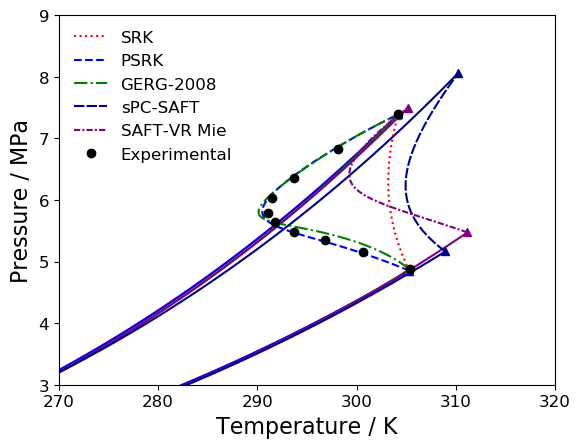

In [115]:
plt.plot(T_eth[1],p_eth[1]./1e6,label="",linestyle="-",color="r")
plt.plot(T_eth[2],p_eth[2]./1e6,label="",linestyle="-",color="b")
plt.plot(T_eth[3],p_eth[3]./1e6,label="",linestyle="-",color="g")
plt.plot(T_eth[4],p_eth[4]./1e6,label="",linestyle="-",color="purple")
plt.plot(T_eth[5],p_eth[5]./1e6,label="",linestyle="-",color="darkblue")
plt.plot(T_dec[1],p_dec[1]./1e6,label="",linestyle="-",color="r")
plt.plot(T_dec[2],p_dec[2]./1e6,label="",linestyle="-",color="b")
plt.plot(T_dec[3],p_dec[3]./1e6,label="",linestyle="-",color="g")
plt.plot(T_dec[4],p_dec[4]./1e6,label="",linestyle="-",color="purple")
plt.plot(T_dec[5],p_dec[5]./1e6,label="",linestyle="-",color="darkblue")
plt.plot(T_eth[1][end],p_eth[1][end]./1e6,label="",marker="^",linestyle="",color="r")
plt.plot(T_eth[2][end],p_eth[2][end]./1e6,label="",marker="^",linestyle="",color="b")
plt.plot(T_eth[3][end],p_eth[3][end]./1e6,label="",marker="^",linestyle="",color="g")
plt.plot(T_eth[4][end],p_eth[4][end]./1e6,label="",marker="^",linestyle="",color="purple")
plt.plot(T_eth[5][end],p_eth[5][end]./1e6,label="",marker="^",linestyle="",color="darkblue")
plt.plot(T_dec[1][end],p_dec[1][end]./1e6,label="",marker="^",linestyle="",color="r")
plt.plot(T_dec[2][end],p_dec[2][end]./1e6,label="",marker="^",linestyle="",color="b")
plt.plot(T_dec[3][end],p_dec[3][end]./1e6,label="",marker="^",linestyle="",color="g")
plt.plot(T_dec[4][end],p_dec[4][end]./1e6,label="",marker="^",linestyle="",color="purple")
plt.plot(T_dec[5][end],p_dec[5][end]./1e6,label="",marker="^",linestyle="",color="darkblue")

plt.plot(T_crit[1],p_crit[1]./1e6,label="SRK",linestyle=":",color="r")
plt.plot(T_crit[2],p_crit[2]./1e6,label="PSRK",linestyle="--",color="b")
plt.plot(T_crit[3],p_crit[3]./1e6,label="GERG-2008",linestyle="-.",color="g")
plt.plot(T_crit[5],p_crit[5]./1e6,label="sPC-SAFT",linestyle=(0, (5, 1)),color="darkblue")
plt.plot(T_crit[4],p_crit[4]./1e6,label="SAFT-VR Mie",linestyle=(0, (3, 1, 1, 1)),color="purple")
plt.plot(T_exp,p_exp,label="Experimental",marker="o",linestyle="",color="k")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.ylim([3.,9.])
plt.xlim([270,320])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("CO2+Eth_crit.pdf")

## Figure A

In [732]:
model = PSRK(["ethane","carbon dioxide","sulfur hexafluoride"])

RK{BasicIdeal, SoaveAlpha, PenelouxTranslation, PSRKRule{PSRKUNIFAC{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}}} with 3 components:
 "ethane"
 "carbon dioxide"
 "sulfur hexafluoride"
Contains parameters: a, b, Tc, Pc, Mw

In [733]:
X1 = [1-2*1e-5 1e-5 1e-5]
x1 = range(1e-5,1-2*1e-5,length=60)
for i=1:59
    x2 = range(1e-5,1-x1[i]-1e-5,length=60-i+1)
    x3 = 1 .-x2 .-x1[i]
    X = hcat(x1[i]*ones(60-i+1,1),x2,x3)
    X1 = vcat(X1,X)
end
x = vcat(X1[2:end,:],X1[1,:]')

1830×3 Matrix{Float64}:
 1.0e-5    1.0e-5     0.99998
 1.0e-5    0.0169586  0.983031
 1.0e-5    0.0339073  0.966083
 1.0e-5    0.0508559  0.949134
 1.0e-5    0.0678046  0.932185
 1.0e-5    0.0847532  0.915237
 1.0e-5    0.101702   0.898288
 1.0e-5    0.118651   0.881339
 1.0e-5    0.135599   0.864391
 1.0e-5    0.152548   0.847442
 1.0e-5    0.169496   0.830494
 1.0e-5    0.186445   0.813545
 1.0e-5    0.203394   0.796596
 ⋮                    
 0.932185  0.0508559  0.0169586
 0.932185  0.0678046  1.0e-5
 0.949134  1.0e-5     0.0508559
 0.949134  0.0169586  0.0339073
 0.949134  0.0339073  0.0169586
 0.949134  0.0508559  1.0e-5
 0.966083  1.0e-5     0.0339073
 0.966083  0.0169586  0.0169586
 0.966083  0.0339073  1.0e-5
 0.983031  1.0e-5     0.0169586
 0.983031  0.0169586  1.0e-5
 0.99998   1.0e-5     1.0e-5

In [734]:
T = []
p = []
v0 = []
mix_crit = []
k=0
    for i=1:60
        println(i)
        if i==1
            for j=1:60-i+1
                if j==1 || j==60
                    append!(mix_crit,[crit_mix(model,x[k+j,:]) ])
                    v0 = [log10(mix_crit[k+j][3]),mix_crit[k+j][1]]
                    append!(T,mix_crit[k+j][1])
                    append!(p,mix_crit[k+j][2])
                else
                    append!(mix_crit,[crit_mix(model,x[k+j,:];v0=v0)])
                    v0 = [log10(mix_crit[k+j][3]),mix_crit[k+j][1]]
                    append!(T,mix_crit[k+j][1])
                    append!(p,mix_crit[k+j][2])
                end
            println(k+j)
            end
        else
            for j=1:60-i+1
        
                    v0 = [(log10(mix_crit[k-(60-i+1)+j-1][3])+log10(mix_crit[k-(60-i+1)+j][3]))/2,(mix_crit[k-(60-i+1)+j-1][1]+mix_crit[k-(60-i+1)+j][1])/2]
        append!(mix_crit,[crit_mix(model,x[k+j,:];v0=v0)])
                    append!(T,mix_crit[k+j][1])
                    append!(p,mix_crit[k+j][2])
        println(k+j)
            end
            
        end
        k+=61-i
    end 

1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
2
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
3
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
4
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
5
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
27

1828


LoadError: DomainError with -0.0019303491942818498:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [735]:
pure = split_model(model)

crit = crit_pure.(pure)
T_1 = range(0.7*crit[1][1],crit[1][1],length=100)
sat_1 = saturation_pressure.(pure[1],T_1)
p_1 = [sat_1[i][1] for i ∈ 1:100]

T_2 = range(0.7*crit[2][1],crit[2][1],length=100)
sat_2 = saturation_pressure.(pure[2],T_2)
p_2 = [sat_2[i][1] for i ∈ 1:100]

T_3 = range(0.7*crit[3][1],crit[3][1],length=100)
sat_3 = saturation_pressure.(pure[3],T_3)
p_3 = [sat_3[i][1] for i ∈ 1:100]

100-element Vector{Float64}:
 233424.2158534992
 243119.7809820377
 253120.02468953503
 263431.1169018258
 274059.2691048621
 285010.7335399753
 296291.8024123248
 307908.8071128525
 319868.12315729796
 332176.1482582688
 344839.33129601245
 357864.15298264223
 371257.1295512808
      ⋮
      3.0034641754400562e6
      3.0668554979428607e6
      3.1311995374587737e6
      3.1965046213828344e6
      3.262779100341215e6
      3.3300313483303324e6
      3.3982697659065183e6
      3.4675027624676414e6
      3.537738813918268e6
      3.6089863652791968e6
      3.6812539197979663e6
      3.7545499999999953e6

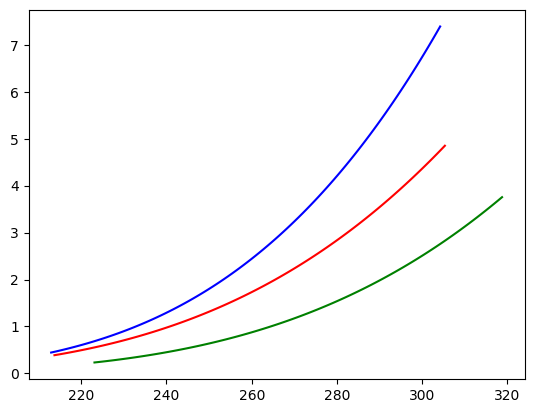

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x17cdf80d0>

In [723]:
plt.plot(T_1,p_1./1e6,color="r",  alpha = 1.)
plt.plot(T_2,p_2./1e6,color="b",  alpha = 1.)
plt.plot(T_3,p_3./1e6,color="g",  alpha = 1.)

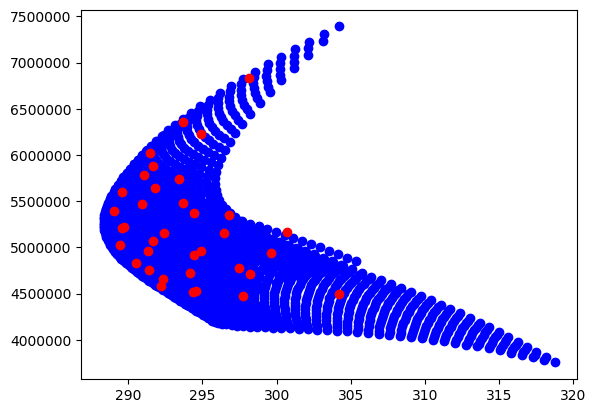

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x240e1aa50>

In [772]:
plt.plot(T,p,linestyle="",marker="o",color="b")
plt.plot(exp[:,1],exp[:,2],linestyle="",marker="o",color="r")

In [765]:
exp = [300.7	5162000	0.1223	0.8777
296.82	5352000	0.2403	0.7597
293.66	5485000	0.3548	0.6452
291.8	5644000	0.4607	0.5393
291.04	5787000	0.5605	0.4395
291.48	6026000	0.6601	0.3399
293.71	6358000	0.7657	0.2343
298.16	6831000	0.8805	0.1195
297.47	4772000	0.1009	0.7997
294.43	4913000	0.1997	0.7004
291.67	5073000	0.2995	0.6009
289.75	5220000	0.3993	0.5005
289.06	5393000	0.5	0.4001
289.57	5601000	0.5998	0.3007
291.66	5884000	0.7001	0.2001
294.92	6226000	0.8001	0.1003
294.57	4523000	0.0997	0.6992
292.32	4661000	0.1988	0.6002
290.52	4834000	0.2998	0.5006
289.48	5021000	0.3994	0.4008
289.58	5206000	0.499	0.3004
290.92	5467000	0.6008	0.1991
293.45	5742000	0.7003	0.1003
292.18	4578000	0.2008	0.4991
291.39	4757000	0.301	0.3993
291.33	4960000	0.4004	0.3001
292.43	5155000	0.5009	0.1999
294.45	5373000	0.6	0.1
294.34	4522000	0.1997	0.4005
294.19	4727000	0.2998	0.3006
294.89	4957000	0.2	0.4005
296.44	5155000	0.4999	0.1004
297.72	4474000	0.1998	0.2996
298.23	4712000	0.3001	0.2005
299.65	4943000	0.3998	0.1005
304.19	4500000	0.2327	0.1336];


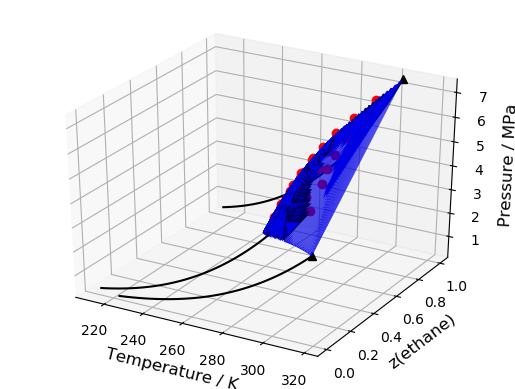

([-0.2, 0.0, 0.2, 0.4000000000000001, 0.6000000000000001, 0.8, 1.0000000000000002, 1.2000000000000002], PyObject[PyObject Text(-0.2, 0, '−0.2'), PyObject Text(0.02966333654514642, -0.088717020360839, '0.0'), PyObject Text(0.0384952172528244, -0.07948217563330219, '0.2'), PyObject Text(0.04708554372026667, -0.07049990631701561, '0.4'), PyObject Text(0.055444092114299647, -0.06175999019706717, '0.6'), PyObject Text(0.06358011807681857, -0.053252749332983476, '0.8'), PyObject Text(0.07150239091341737, -0.04496901431020736, '1.0'), PyObject Text(1.2000000000000002, 0, '1.2')])

In [770]:
plt.surf(T,x[:,2],p./1e6,  alpha = 1., color="b")
plt.plot(T_1,zeros(100),p_1./1e6,color="k",  alpha = 1.)
plt.plot(T_2,ones(100),p_2./1e6,color="k",  alpha = 1.)
plt.plot(T_3,zeros(100),p_3./1e6,color="k",  alpha = 1.)
plt.plot([T_1[end]],[0],[p_1[end]./1e6],color="k",marker="^",  alpha = 1.)
plt.plot([T_2[end]],[1],[crit[2][2]./1e6],color="k",marker="^",  alpha = 1.)
plt.plot([T_3[end]],[0],[p_3[end]./1e6],color="k",marker="^",  alpha = 1.)

plt.plot(exp[:,1],exp[:,3],exp[:,2]./1e6,linestyle="",color="r",marker="o",  alpha = 1.)
plt.xlabel("Temperature / K",fontsize=12)
plt.zlabel("Pressure / MPa",fontsize=12)
plt.ylabel("z(ethane)",fontsize=12)

# plt.zlim([0.,6.])
# plt.xlim([250,550])
# plt.ylim([0,1])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.savefig("3_crit_curve.pdf")

## Figure B

In [73]:
model1 = VTPR(["ethane","decane"])
model2 = GERG2008(["ethane","decane"])
model3 = SAFTVRMie(["ethane","n-decane"])
model4 = SAFTgammaMie(["ethane","decane"])
model5 = softSAFT(["ethane","decane"])

models = [model1,model2,model3,model4,model5];

In [74]:
p_eth = []
p_dec = []
T_eth = []
T_dec = []
for j=1:5
    pure = split_model(models[j])
    crit = crit_pure.(pure)
    T = []
    sat = []
    for i=1:2
        append!(T,[range(0.7*crit[i][1],crit[i][1],length=100)])
        append!(sat,[saturation_pressure.(pure[i],T[i])])
    end

    append!(p_eth,[[sat[1][i][1] for i ∈ 1:100]])
    append!(p_dec,[[sat[2][i][1] for i ∈ 1:100]])
    append!(T_eth,[T[1]])
    append!(T_dec,[T[2]])
end

In [78]:
x = 1 .-range(1e-5,1-1e-5,length=200)
X = Clapeyron.FractionVector.(x)
# T_crit = []
# p_crit = []
for j=2:2
    T = []
    p = []
    println(j)
    v0 = []
    for i=1:200
        if i==1
            mix_crit = crit_mix(models[j],X[i]) 
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        else
            mix_crit = crit_mix(models[j],X[i];v0=v0)
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        end
        println(i)
    end
    T_crit[2]=T
    p_crit[2]=p
end

2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [76]:
exp = [344.36486744230405 81.78571428571428
377.8223345412932 105.17857142857143
411.3770741941637 116.42857142857143
444.60566469578487 118.39285714285714
477.8900438680145 113.39285714285714
511.62216288384514 102.5]

6×2 Matrix{Float64}:
 344.365   81.7857
 377.822  105.179
 411.377  116.429
 444.606  118.393
 477.89   113.393
 511.622  102.5

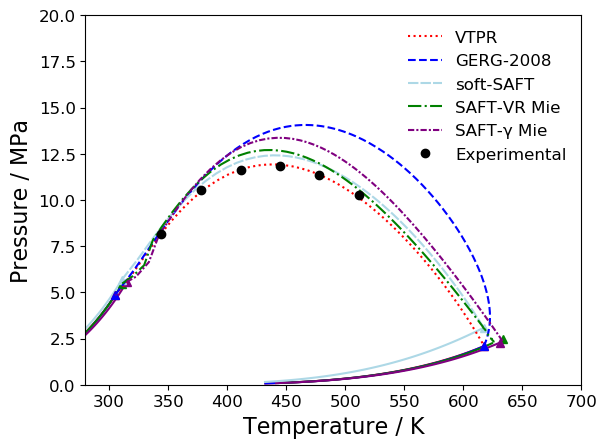

In [79]:
plt.plot(T_eth[1],p_eth[1]./1e6,label="",linestyle="-",color="r")
plt.plot(T_eth[2],p_eth[2]./1e6,label="",linestyle="-",color="b")
plt.plot(T_eth[3],p_eth[3]./1e6,label="",linestyle="-",color="g")
plt.plot(T_eth[4],p_eth[4]./1e6,label="",linestyle="-",color="purple")
plt.plot(T_eth[5],p_eth[5]./1e6,label="",linestyle="-",color="lightblue")
plt.plot(T_dec[1],p_dec[1]./1e6,label="",linestyle="-",color="r")
plt.plot(T_dec[2],p_dec[2]./1e6,label="",linestyle="-",color="b")
plt.plot(T_dec[3],p_dec[3]./1e6,label="",linestyle="-",color="g")
plt.plot(T_dec[4],p_dec[4]./1e6,label="",linestyle="-",color="purple")
plt.plot(T_dec[5],p_dec[5]./1e6,label="",linestyle="-",color="lightblue")
plt.plot(T_eth[1][end],p_eth[1][end]./1e6,label="",marker="^",linestyle="",color="r")
plt.plot(T_eth[2][end],p_eth[2][end]./1e6,label="",marker="^",linestyle="",color="b")
plt.plot(T_eth[3][end],p_eth[3][end]./1e6,label="",marker="^",linestyle="",color="g")
plt.plot(T_eth[4][end],p_eth[4][end]./1e6,label="",marker="^",linestyle="",color="purple")
plt.plot(T_eth[5][end],p_eth[5][end]./1e6,label="",marker="^",linestyle="",color="lightblue")
plt.plot(T_dec[1][end],p_dec[1][end]./1e6,label="",marker="^",linestyle="",color="r")
plt.plot(T_dec[2][end],p_dec[2][end]./1e6,label="",marker="^",linestyle="",color="b")
plt.plot(T_dec[3][end],p_dec[3][end]./1e6,label="",marker="^",linestyle="",color="g")
plt.plot(T_dec[4][end],p_dec[4][end]./1e6,label="",marker="^",linestyle="",color="purple")
plt.plot(T_dec[5][end],p_dec[5][end]./1e6,label="",marker="^",linestyle="",color="lightblue")

plt.plot(T_crit[1],p_crit[1]./1e6,label="VTPR",linestyle=":",color="r")
plt.plot(T_crit[2],p_crit[2]./1e6,label="GERG-2008",linestyle="--",color="b")
plt.plot(T_crit[5],p_crit[5]./1e6,label="soft-SAFT",linestyle=(0, (5, 1)),color="lightblue")
plt.plot(T_crit[3],p_crit[3]./1e6,label="SAFT-VR Mie",linestyle="-.",color="g")
plt.plot(T_crit[4],p_crit[4]./1e6,label="SAFT-γ Mie",linestyle=(0, (3, 1, 1, 1)),color="purple")
plt.plot(exp[:,1],exp[:,2]./10,label="Experimental",marker="o",linestyle="",color="k")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.ylim([0.,20.])
plt.xlim([280,700])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Eth+Dec_crit.pdf")

## Figure C

In [186]:
model = PCSAFT(["methanol","cyclohexane"])
pure  = Clapeyron.split_model(model)
crit = crit_pure.(pure);
UCEP = UCEP_mix(model);
T_1 = range(310,crit[1][1],length=200)
T_2 = range(310,crit[2][1],length=200)
T_3 = range(310,UCEP[1]*0.999,length=200)
T_4 = []
T_5 = range(UCEP[1],520,length=200)
T_6 = range(UCEP[1],UCEP[1]*1.8,length=200)

x = range(1e-30,1-1e-6,length=200)
X = Clapeyron.FractionVector.(x)

p_1 = []
p_2 = []
p_3 = []
p_4 = []
p_5 = []
p_6 = []

v0_1 = 0.
v0_2 = 0.
v0_3 = 0.
v0_4 = 0.
v0_5 = 0.
v0_6 = 0.
v_l_5 = []
v_v_5 = []
x_5    = []
for i in 1:200
    if i == 1
        sat_1 = saturation_pressure(pure[1],T_1[i])
        v0_1  = log10.([sat_1[2],sat_1[3]])
        append!(p_1,sat_1[1])
        
        sat_2 = saturation_pressure(pure[2],T_2[i])
        v0_2  = log10.([sat_2[2],sat_2[3]])
        append!(p_2,sat_2[1])
        
        three = VLLE_pressure(model,T_3[i])
        v0_3  = [log10(three[2]),log10(three[3]),log10(three[4]),three[5][1],three[6][1],three[7][1]]
        append!(p_3,three[1])
        
        crit_1 = crit_mix(model,X[i])
        v0_4   = [log10(crit_1[3]),crit_1[1]]
        append!(p_4,crit_1[2])
        append!(T_4,crit_1[1])
        
        az     = azeotrope_pressure(model,T_5[i])
        v0_5   = [log10(az[2]),log10(az[3]),az[4][1],az[4][2]]
        append!(p_5,az[1])
        append!(v_l_5,az[2])
        append!(v_v_5,az[3])
        append!(x_5,az[4][1])
        
        UCST_1 = UCST_mix(model,T_6[i];v0=[log10(UCEP[3]),UCEP[5][1]])
        v0_6   = [log10(UCST_1[2]),UCST_1[3][1]]
        append!(p_6,UCST_1[1])
    else
        sat_1 = saturation_pressure(pure[1],T_1[i],v0_1)
        v0_1  = log10.([sat_1[2],sat_1[3]])
        append!(p_1,sat_1[1])
        
        sat_2 = saturation_pressure(pure[2],T_2[i],v0_2)
        v0_2  = log10.([sat_2[2],sat_2[3]])
        append!(p_2,sat_2[1])
        
        three = VLLE_pressure(model,T_3[i];v0=v0_3)
        v0_3  = [log10(three[2]),log10(three[3]),log10(three[4]),three[5][1],three[6][1],three[7][1]]
        append!(p_3,three[1])
        
        crit_1 = crit_mix(model,X[i];v0=v0_4)
        v0_4   = [log10(crit_1[3]),crit_1[1]]
        append!(p_4,crit_1[2])
        append!(T_4,crit_1[1])
        
        az     = azeotrope_pressure(model,T_5[i];v0=v0_5)
        v0_5   = [log10(az[2]),log10(az[3]),az[4][1],az[4][2]]
        append!(p_5,az[1])
        append!(v_l_5,az[2])
        append!(v_v_5,az[3])
        append!(x_5,az[4][1])
        
        UCST_1 = UCST_mix(model,T_6[i];v0=v0_6)
        v0_6   = [log10(UCST_1[2]),UCST_1[3][1]]
        append!(p_6,UCST_1[1])
    end
end

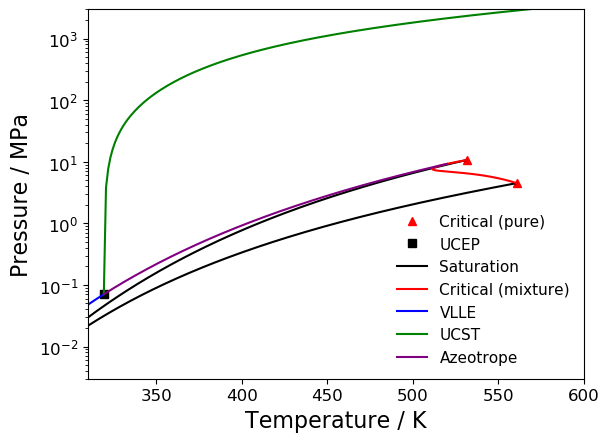

In [201]:
plt.semilogy(crit[1][1],crit[1][2]./1e6,label="Critical (pure)",linestyle="",color="red",marker="^")
plt.plot(crit[2][1],crit[2][2]./1e6,label="",linestyle="",color="red",marker="^")
plt.plot(UCEP[1],UCEP[2]./1e6,label="UCEP",linestyle="",color="k",marker="s")
plt.plot(T_1,p_1./1e6,label="Saturation",color="k")
plt.plot(T_2,p_2./1e6,label="",color="k")
plt.plot(T_4,p_4./1e6,label="Critical (mixture)",color="r")
plt.plot(T_3,p_3./1e6,label="VLLE",color="blue")
plt.plot(T_6,p_6./1e6,label="UCST",color="green")
plt.plot(T_5,p_5./1e6,label="Azeotrope",color="purple")

plt.legend(loc="bottom right",frameon=false,fontsize=11) 
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.ylim([3e-3,3e3])
plt.xlim([310,600])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("MeOH+CyHx_pT.pdf")

## Figure D
methanol+ethane

In [521]:
model1 = PCSAFT(["methanol","ethane"])
model2 = SAFTgammaMie(["methanol","ethane"])
model3 = PR(["methanol","ethane"])

PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule} with 2 components:
 "methanol"
 "ethane"
Contains parameters: a, b, Tc, Pc, Mw

In [522]:
VLLE_PC=VLLE_pressure(model1,298.15;v0 = [log10(4.8654636008937104e-5),log10(7.709740609838804e-5),log10(0.00035501867564056083),0.64,0.08,0.007])
x1_PC = range(1e-6,VLLE_PC[6][1],length=100)
x2_PC = range(VLLE_PC[5][1],1-1e-6,length=100)
x3_PC = range(VLLE_PC[6][1],5*VLLE_PC[6][1],length=100)

X1 = Clapeyron.FractionVector.(x1_PC)
X2 = Clapeyron.FractionVector.(x2_PC)
X3 = Clapeyron.FractionVector.(x3_PC)

bub1 = bubble_pressure.(model1,298.15,X1)
bub2 = bubble_pressure.(model1,298.15,X2)
LLE = LLE_pressure.(model1,298.15,X3)

p1_PC = [bub1[i][1] for i ∈ 1:100]
p2_PC = [bub2[i][1] for i ∈ 1:100]
p3_PC = [LLE[i][1] for i ∈ 1:100]

y1_PC = [bub1[i][4][1] for i ∈ 1:100]
y2_PC = [bub2[i][4][1] for i ∈ 1:100]
y3_PC = [LLE[i][4][1] for i ∈ 1:100]

100-element Vector{Float64}:
 0.4366186715216927
 0.4335257199913783
 0.4304404349999453
 0.42736795811282835
 0.42431230209276316
 0.4212765898337014
 0.41826323852767133
 0.41527410282515853
 0.4123105869761618
 0.4093737332917392
 0.40646429236969733
 0.4035827791715976
 0.4007295180355891
 ⋮
 0.24521346896204915
 0.24370913234934632
 0.24221431564890578
 0.24072891135410107
 0.23925281408545912
 0.23778592062959017
 0.23632813006792158
 0.23487934417569778
 0.2334394686020008
 0.23200841547009154
 0.23058610921792816
 0.22917228978517953

In [523]:
VLLE_gamma=VLLE_pressure(model2,298.15;v0 = [log10(4.8654636008937104e-5),log10(8.709740609838804e-5),log10(0.00035501867564056083),0.64,0.08,0.007])
x1_gamma = range(1e-6,VLLE_gamma[6][1],length=100)
x2_gamma = range(VLLE_gamma[5][1],1-1e-6,length=100)
x3_gamma = range(VLLE_gamma[6][1],1.2*VLLE_gamma[6][1],length=100)

X1 = Clapeyron.FractionVector.(x1_gamma)
X2 = Clapeyron.FractionVector.(x2_gamma)
X3 = Clapeyron.FractionVector.(x3_gamma)

bub1 = bubble_pressure.(model2,298.15,X1)
bub2 = bubble_pressure.(model2,298.15,X2)
LLE = LLE_pressure.(model2,298.15,X3)

p1_gamma = [bub1[i][1] for i ∈ 1:100]
p2_gamma = [bub2[i][1] for i ∈ 1:100]
p3_gamma = [LLE[i][1] for i ∈ 1:100]

y1_gamma = [bub1[i][4][1] for i ∈ 1:100]
y2_gamma = [bub2[i][4][1] for i ∈ 1:100]
y3_gamma = [LLE[i][4][1] for i ∈ 1:100]

100-element Vector{Float64}:
 0.6640755506976805
 0.6638730370389577
 0.6636700106316784
 0.6634664765977324
 0.6632624400164688
 0.6630579059235251
 0.6628528793142484
 0.6626473651413105
 0.6624413683177438
 0.6622348937149267
 0.6620279461636708
 0.6618205304557682
 0.6616126513426928
 ⋮
 0.6447676665187462
 0.6445357397151342
 0.6443036229219745
 0.6440713186580617
 0.6438388294198352
 0.6436061576852804
 0.643373305913003
 0.6431402765421023
 0.6429070719926989
 0.6426736946661986
 0.6424401469444909
 0.6422064311926567

In [524]:
VLLE_PR=VLLE_pressure(model3,298.15;v0 = [log10(5.0829874375196166e-5),log10(6.433971553612239e-5),log10(0.00043337290431935867),0.64,0.20,0.01])

x1_PR = range(1e-6,VLLE_PR[6][1],length=100)
x2_PR = range(VLLE_PR[5][1],1-1e-6,length=100)
x3_PR = range(VLLE_PR[6][1],2*VLLE_PR[6][1],length=100)

X1 = Clapeyron.FractionVector.(x1_PR)
X2 = Clapeyron.FractionVector.(x2_PR)
X3 = Clapeyron.FractionVector.(x3_PR)

v1 = [log10(VLLE_PR[3]),log10(VLLE_PR[4]),VLLE_PR[7][1],VLLE_PR[7][2]]
v2 = [log10(VLLE_PR[2]),log10(VLLE_PR[4]),VLLE_PR[7][1],VLLE_PR[7][2]]
v3 = [log10(VLLE_PR[3]),log10(VLLE_PR[2]),VLLE_PR[5][1],VLLE_PR[5][2]]


p1_PR = []
p2_PR = []
p3_PR = []

y1_PR = []
y2_PR = []
y3_PR = []

for i=1:100
    println(i)
        bub1 = bubble_pressure(model3,298.15,X1[i];v0=v1)
        bub2 = bubble_pressure(model3,298.15,X2[i];v0=v2)
        LLE = LLE_pressure(model3,298.15,X3[i];v0=v3)
    
        v1 = [log10(bub1[2]),log10(bub1[3]),bub1[4][1],bub1[4][2]]
        v2 = [log10(bub2[2]),log10(bub2[3]),bub2[4][1],bub2[4][2]]
        v3 = [log10(LLE[2]),log10(LLE[3]),LLE[4][1],LLE[4][2]]

        append!(p1_PR,bub1[1])
        append!(p2_PR,bub2[1])
        append!(p3_PR,LLE[1])

        append!(y1_PR,bub1[4][1])
        append!(y2_PR,bub2[4][1])
        append!(y3_PR,LLE[4][1])
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [525]:
x_exp = [0.038
0.059
0.111
0.6
0.577
0.517]

p_exp = [4091000
4859000
6769000
4091000
4859000
6769000]

y_exp = [0.947
0.887
0.801
0.759
0.656
0.6
0.038
0.028
0.012
0
0.041
0.022
0.014
0.009
0.005
0.005
0.005
0.003
0.002
0]

p2_exp = [963001
2058000
3061000
3410000
3940000
4091000
4091000
4133000
4155000
4189000
963001
2058000
3061000
3410000
3940000
4091000
4091000
4133000
4155000
4189000];

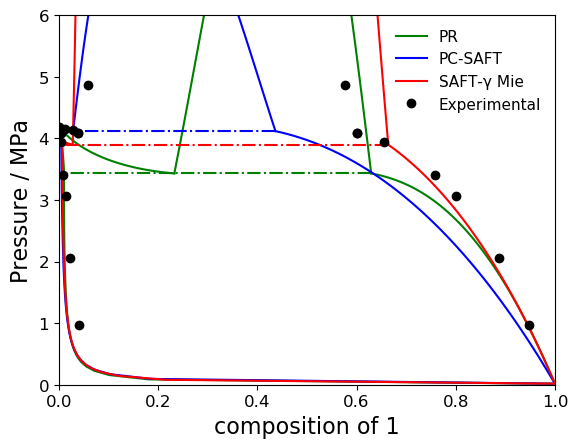

In [526]:
plt.plot(y1_PR,p1_PR./1e6,label="PR",linestyle="-",color="g")
plt.plot(x1_PR,p1_PR./1e6,label="",linestyle="-",color="g")

plt.plot(y2_PR,p2_PR./1e6,label="",linestyle="-",color="g")
plt.plot(x2_PR,p2_PR./1e6,label="",linestyle="-",color="g")
plt.plot(y3_PR,p3_PR./1e6,label="",linestyle="-",color="g")
plt.plot(x3_PR,p3_PR./1e6,label="",linestyle="-",color="g")

plt.plot([VLLE_PR[5][1],VLLE_PR[6][1],VLLE_PR[7][1]],[VLLE_PR[1],VLLE_PR[1],VLLE_PR[1]]./1e6,label="",linestyle="-.",color="g")

plt.plot(y1_PC,p1_PC./1e6,label="PC-SAFT",linestyle="-",color="b")
plt.plot(x1_PC,p1_PC./1e6,label="",linestyle="-",color="b")

plt.plot(y2_PC,p2_PC./1e6,label="",linestyle="-",color="b")
plt.plot(x2_PC,p2_PC./1e6,label="",linestyle="-",color="b")
plt.plot(y3_PC,p3_PC./1e6,label="",linestyle="-",color="b")
plt.plot(x3_PC,p3_PC./1e6,label="",linestyle="-",color="b")

plt.plot([VLLE_PC[5][1],VLLE_PC[6][1],VLLE_PC[7][1]],[VLLE_PC[1],VLLE_PC[1],VLLE_PC[1]]./1e6,label="",linestyle="-.",color="b")


plt.plot(y1_gamma,p1_gamma./1e6,label="SAFT-γ Mie",linestyle="-",color="r")
plt.plot(x1_gamma,p1_gamma./1e6,label="",linestyle="-",color="r")

plt.plot(y2_gamma,p2_gamma./1e6,label="",linestyle="-",color="r")
plt.plot(x2_gamma,p2_gamma./1e6,label="",linestyle="-",color="r")
plt.plot(y3_gamma,p3_gamma./1e6,label="",linestyle="-",color="r")
plt.plot(x3_gamma,p3_gamma./1e6,label="",linestyle="-",color="r")

plt.plot([VLLE_gamma[5][1],VLLE_gamma[6][1],VLLE_gamma[7][1]],[VLLE_gamma[1],VLLE_gamma[1],VLLE_gamma[1]]./1e6,label="",linestyle="-.",color="r")

plt.plot(x_exp,p_exp./1e6,label="Experimental",marker="o",linestyle="",color="k")
plt.plot(y_exp,p2_exp./1e6,label="",marker="o",linestyle="",color="k")


plt.legend(loc="top right",frameon=false,fontsize=11) 

plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.ylim([0,6])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Pxxy_MeOH_Eth.pdf")

## Figure E
methanol+cyclohexane

In [2]:
model1 = SAFTgammaMie(["methanol","cyclohexane"])
model2 = PCSAFT(["methanol","cyclohexane"])
model3 = SRK(["methanol","cyclohexane"])

RK{BasicIdeal, SoaveAlpha, NoTranslation, vdW1fRule} with 2 components:
 "methanol"
 "cyclohexane"
Contains parameters: a, b, Tc, Pc, Mw

In [528]:
function Clapeyron.LLE_temperature(model,p,x;T0=nothing)
    f(z) = Clapeyron.Obj_LLE_temperature(model,z,p,x)
    if T0===nothing
        Ti   = Clapeyron.T_scales(model,x).*1.5
        T = Clapeyron.Roots.find_zero(f,sum(Ti)/length(Ti))
    else
        T = Clapeyron.Roots.find_zero(f,T0)
    end
    p,v_l,v_ll,xx = LLE_pressure(model,T,x)
    return T,v_l,v_ll,xx
end

In [3]:
VLLE_gamma = VLLE_pressure(model1,325.8576;v0=[log10(4.366652011766123e-5),
                                log10(0.0001098063430027416),
                                log10(0.023701084645953704),
                                0.98,0.05,0.62])
x1_gamma = range(1e-5,VLLE_gamma[6][1],length=100)
x2_gamma = range(VLLE_gamma[5][1],1-1e-5,length=100)
x3_gamma = range(VLLE_gamma[5][1],VLLE_gamma[5][1]*1.008,length=100)

X1 = Clapeyron.FractionVector.(x1_gamma)
X2 = Clapeyron.FractionVector.(x2_gamma)
X3 = Clapeyron.FractionVector.(x3_gamma)

bub1 = []
bub2 = []
LLE = []
T0 = 325.8576
for i ∈ 1:100
    println(i)
    append!(bub1, [bubble_temperature(model1,1.013e5,X1[i];T0=330)])
    append!(bub2, [bubble_temperature(model1,1.013e5,X2[i];T0=330)])
    append!(LLE ,[LLE_temperature(model1,1.013e5,X3[i];T0=T0)])
    T0 = LLE[i][1]
    println(T0)
end
T1_gamma = [bub1[i][1] for i ∈ 1:100]
T2_gamma = [bub2[i][1] for i ∈ 1:100]
T3_gamma = [LLE[i][1] for i ∈ 1:100]

y1_gamma = [bub1[i][4][1] for i ∈ 1:100]
y2_gamma = [bub2[i][4][1] for i ∈ 1:100]
y3_gamma = [LLE[i][4][1] for i ∈ 1:100]


1


┌ Error: initial temperature 588.7875060770443 greater than critical temperature 524.1486890175527. returning NaN
└ @ Clapeyron /Users/pierrewalker/Documents/University/UROP/SAFT codes/Clapeyron/src/methods/property_solvers/singlecomponent/saturation.jl:57
┌ Error: initial temperature 588.7875060770443 greater than critical temperature 564.2095932096465. returning NaN
└ @ Clapeyron /Users/pierrewalker/Documents/University/UROP/SAFT codes/Clapeyron/src/methods/property_solvers/singlecomponent/saturation.jl:57
┌ Error: initial temperature 588.7874999999999 greater than critical temperature 524.1486890175527. returning NaN
└ @ Clapeyron /Users/pierrewalker/Documents/University/UROP/SAFT codes/Clapeyron/src/methods/property_solvers/singlecomponent/saturation.jl:57
┌ Error: initial temperature 588.7874999999999 greater than critical temperature 564.2095932096465. returning NaN
└ @ Clapeyron /Users/pierrewalker/Documents/University/UROP/SAFT codes/Clapeyron/src/methods/property_solvers/singl

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

In [4]:
x1_PC = range(1e-5,1-1e-5,length=100)
X = Clapeyron.FractionVector.(x)
bub = bubble_temperature.(model2,1.013e5,X)

T1_PC = [bub[i][1] for i ∈ 1:100]
y1_PC = [bub[i][4][1] for i ∈ 1:100]

append!(y1_PC,reverse(x1_PC))
append!(T1_PC,reverse(T1_PC))

x2 = range(0.05,0.416,length=50)
X2 = Clapeyron.FractionVector.(x2)
T0 = 290 
LLE = []
for i ∈ 1:50
    println(i)
    if i == 1
        append!(LLE,[LLE_temperature(model2,1.013e5,X2[i])])
        T0 = LLE[i][1]
    else
        append!(LLE,[LLE_temperature(model2,1.013e5,X2[i];T0=T0)])
        T0 = LLE[i][1]
    end
    println(T0)
end

T2_PC = [LLE[i][1] for i ∈ 1:50]
x2_PC = [LLE[i][4][1] for i ∈ 1:50]

append!(x2_PC,reverse(x2))
append!(T2_PC,reverse(T2_PC))

LoadError: UndefVarError: x not defined

In [5]:
x1_PR = range(1e-5,1-1e-5,length=100)
X = Clapeyron.FractionVector.(x)

T0 = 350 
bub = []
for i ∈ 1:100
    println(i)
    if i == 1
        append!(bub,[bubble_temperature(model3,1.013e5,X[i];T0=T0)])
        T0 = bub[i][1]
    else
        append!(bub,[bubble_temperature(model3,1.013e5,X[i];T0=T0)])
        T0 = bub[i][1]
    end
    println(T0)
end


T1_PR = [bub[i][1] for i ∈ 1:100]
y1_PR = [bub[i][4][1] for i ∈ 1:100]

append!(y1_PR,reverse(x1_PR))
append!(T1_PR,reverse(T1_PR))

# x2 = range(0.05,0.416,length=50)
# X2 = Clapeyron.FractionVector.(x2)
# T0 = 290 
# LLE = []
# for i ∈ 1:50
#     println(i)
#     if i == 1
#         append!(LLE,[LLE_temperature(model3,1.013e5,X2[i])])
#         T0 = LLE[i][1]
#     else
#         append!(LLE,[LLE_temperature(model3,1.013e5,X2[i];T0=T0)])
#         T0 = LLE[i][1]
#     end
#     println(T0)
# end

# T2_PR = [LLE[i][1] for i ∈ 1:50]
# x2_PR = [LLE[i][4][1] for i ∈ 1:50]

# append!(x2_PR,reverse(x2))

# append!(T2_PR,reverse(T2_PR))

LoadError: UndefVarError: x not defined

In [533]:
T = range(290,317.3,length=100)
T = [T[i] for i ∈ 1:100]
method = 
z = [0.65,0.35]
x1 = []
x2 = []
K0 = [4.5,0.125]
for i =1:100
    println(i)
    flash = tp_flash(model3,1.013e5,T[i],z,RRTPFlash(K0=K0))
    append!(x1,flash[1][1,1])
    append!(x2,flash[1][2,1])
    K0 = flash[1][2,:]./flash[1][1,:]
end
append!(x1,reverse(x2))
append!(T,reverse(T))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


200-element Vector{Float64}:
 290.0
 290.27575757575755
 290.55151515151516
 290.8272727272727
 291.1030303030303
 291.3787878787879
 291.6545454545454
 291.93030303030304
 292.2060606060606
 292.4818181818182
 292.75757575757575
 293.03333333333336
 293.3090909090909
   ⋮
 293.03333333333336
 292.75757575757575
 292.4818181818182
 292.2060606060606
 291.93030303030304
 291.6545454545454
 291.3787878787879
 291.1030303030303
 290.8272727272727
 290.55151515151516
 290.27575757575755
 290.0

In [534]:
y_exp = [0
0.037
0.186
0.3
0.382
0.485
0.59
0.811
0.914
0.972
1
0
0.564
0.59
0.594
0.595
0.597
0.604
0.639
0.706
0.819
1]

T_exp = [353.9
330.2
327.6
327.48
327.47
327.46
327.43
327.57
329.08
332.81
337.8
353.9
330.2
327.6
327.48
327.47
327.46
327.43
327.57
329.08
332.81
337.8]

x_exp = [0.06794
0.8467
0.8016
0.1101
0.1566
0.1968
0.7325
0.6946
0.2831
0.6414
0.3774
0.3867
0.5731
0.5396
0.4313
0.5312
0.52
0.5053
0.4073
0.4952]

T_exp2 = [279.25
290.25
303.55
303.75
305.45
310.65
313.2
315.83
315.95
317.77
318.25
318.47
318.6
318.67
318.68
318.71
318.73
318.75
318.6
318.73]

20-element Vector{Float64}:
 279.25
 290.25
 303.55
 303.75
 305.45
 310.65
 313.2
 315.83
 315.95
 317.77
 318.25
 318.47
 318.6
 318.67
 318.68
 318.71
 318.73
 318.75
 318.6
 318.73

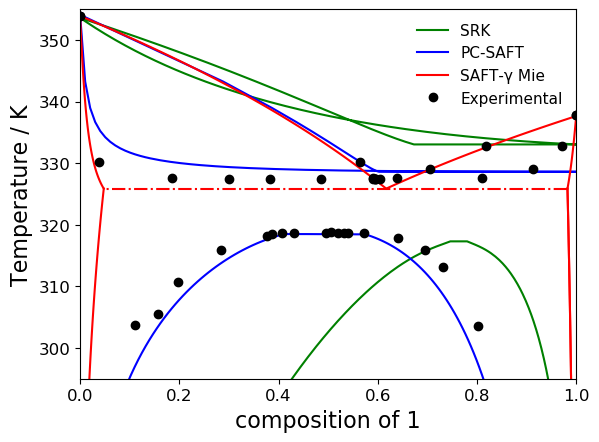

In [535]:
plt.plot(y1_PR,T1_PR,label="SRK",color="g")
plt.plot(x1,T,label="",color="g")


plt.plot(y1_PC,T1_PC,label="PC-SAFT",color="b")

plt.plot(x2_PC,T2_PC,label="",color="b")

plt.plot(y1_gamma,T1_gamma,label="SAFT-γ Mie",color="r")
plt.plot(x1_gamma,T1_gamma,label="",color="r")

plt.plot(y2_gamma,T2_gamma,label="",color="r")
plt.plot(x2_gamma,T2_gamma,label="",color="r")

plt.plot(y3_gamma,T3_gamma,label="",color="r")
plt.plot(x3_gamma,T3_gamma,label="",color="r")
plt.plot(x3_gamma,T3_gamma,label="",color="r")
plt.plot([VLLE_gamma[5][1],VLLE_gamma[7][1],VLLE_gamma[6][1]],[325.8574,325.8574,325.8574],label="",linestyle="-.",color="r")
plt.plot(y_exp,T_exp,label="Experimental",marker="o",linestyle="",color="k")
plt.plot(x_exp,T_exp2,label="",marker="o",linestyle="",color="k")


plt.legend(loc="top right",frameon=false,fontsize=11) 

plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Temperature / K",fontsize=16)
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(295,355)
plt.savefig("Txxy_MeOH_CyHx.pdf")

### Figure F
critical point of alkane series

In [48]:
alkanes = [["methane"],["ethane"],["propane"],["butane"],["pentane"],["hexane"],["heptane"],["octane"],["nonane"],["decane"]]

model1 = SAFTVR.(alkanes)

10-element Vector{BACKSAFT{BasicIdeal}}:
 BACKSAFT{BasicIdeal}("methane")
 BACKSAFT{BasicIdeal}("ethane")
 BACKSAFT{BasicIdeal}("propane")
 BACKSAFT{BasicIdeal}("butane")
 BACKSAFT{BasicIdeal}("pentane")
 BACKSAFT{BasicIdeal}("hexane")
 BACKSAFT{BasicIdeal}("heptane")
 BACKSAFT{BasicIdeal}("octane")
 BACKSAFT{BasicIdeal}("nonane")
 BACKSAFT{BasicIdeal}("decane")

In [49]:
crit = crit_pure.(model1)
Tc6 = [crit[i][1] for i ∈ 1:10]
pc6 = [crit[i][2] for i ∈ 1:10]

10-element Vector{Float64}:
 4.6698644514019275e6
 5.101823896111956e6
 4.296620147458085e6
 3.734321375223193e6
 3.330473093654284e6
 2.989821910848622e6
 2.715740902114591e6
 2.496489614500929e6
 2.3267575713941464e6
 2.1749952304968396e6

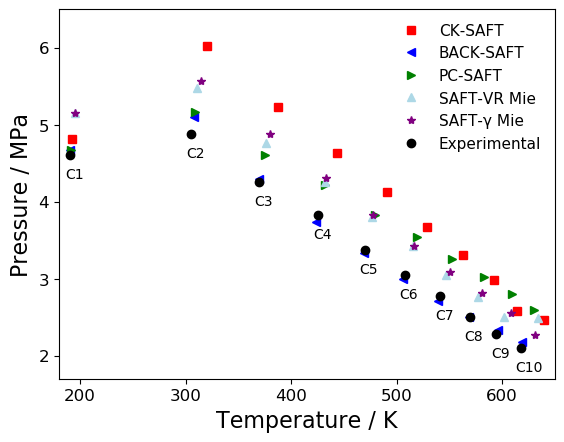

In [74]:
plt.plot(Tc5,pc5./1e6,linestyle="",marker="s",color="r",label="CK-SAFT")
plt.plot(Tc6,pc6./1e6,linestyle="",marker="<",color="b",label="BACK-SAFT")
plt.plot(Tc3,pc3./1e6,linestyle="",marker=">",color="g",label="PC-SAFT")
plt.plot(Tc4,pc4./1e6,linestyle="",marker="^",color="lightblue",label="SAFT-VR Mie")
plt.plot(Tc2,pc2./1e6,linestyle="",marker="*",color="purple",label="SAFT-γ Mie")

plt.plot(Tc1,pc1./1e6,linestyle="",marker="o",color="k",label="Experimental") 
label = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"]
for i ∈ 1:10
    plt.text(Tc1[i].-5, pc1[i]./1e6 .-0.3,label[i])
end
plt.legend(loc="top right",frameon=false,fontsize=11) 

plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xlim([180,650])
plt.ylim([1.7,6.5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("crit_saft.pdf")

In [128]:
model1 = GERG2008(["water"])
model2 = vdW(["water"])
model3 = PR(["water"])
model4 = PCSAFT(["water"])
model5 = SAFTVRMie(["water"])

models = [model1,model2,model3,model4,model5]

5-element Vector{EoSModel}:
 GERG2008("water")
 vdW{BasicIdeal, NoAlpha, NoTranslation, vdW1fRule}("water")
 PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}("water")
 PCSAFT{BasicIdeal}("water")
 SAFTVRMie{BasicIdeal}("water")

In [129]:
crit = crit_pure.(models);

In [132]:
T = []
Hvap = []
for i ∈ 1:5
    append!(T,[range(400,crit[i][1],length=200)])
    append!(Hvap,[enthalpy_vap.(models[i],T[i])])
    println(i)
end


1
2
3
4
5


In [143]:
T_exp = [400
420
440
460
480
500
520
540
560
580
600
620
640]

H_exp = [39.3274
38.264
37.115
35.865
34.492
32.972
31.275
29.359
27.163
24.59
21.465
17.39
10.734];

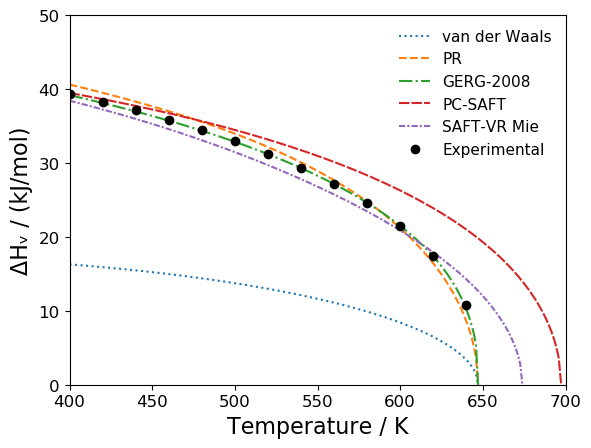

In [145]:
plt.plot(T[2],Hvap[2]./1e3,label="van der Waals",linestyle=":")
plt.plot(T[3],Hvap[3]./1e3,label="PR",linestyle="--")
plt.plot(T[1],Hvap[1]./1e3,label="GERG-2008",linestyle="-.")
plt.plot(T[4],Hvap[4]./1e3,label="PC-SAFT",linestyle=(0, (5, 1)))
plt.plot(T[5],Hvap[5]./1e3,label="SAFT-VR Mie",linestyle=(0, (3, 1, 1, 1)))
plt.plot(T_exp,H_exp,linestyle="",marker="o",color="k",label="Experimental") 

plt.legend(loc="top right",frameon=false,fontsize=11) 

plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("ΔHᵥ / (kJ/mol)",fontsize=16)
plt.xlim([400,700])
plt.ylim([0,50])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Hvap_comp.pdf")

### Figure G
mixing volume of water+ethanol

In [536]:
model1 = PR(["water","ethanol"])
model2 = PSRK(["water","ethanol"])
model3 = SAFTgammaMie(["water","ethanol"])
models = [model1,model2,model3]

3-element Vector{EoSModel}:
 PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}("water", "ethanol")
 RK{BasicIdeal, SoaveAlpha, PenelouxTranslation, PSRKRule{PSRKUNIFAC{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}}}("water", "ethanol")
 SAFTgammaMie{BasicIdeal, SAFTVRMie{BasicIdeal}}("water", "ethanol")

In [537]:
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
V_E = []
for i ∈ 1:3
append!(V_E,[mixing.(models[i],4e5,298.15,X,volume)])
end

In [538]:
Exp = [0.0106	992.2	-0.00000004
0.0216	987.8	-0.000000091
0.0333	983.4	-0.000000149
0.0455	979.3	-0.000000214
0.0583	975.5	-0.000000288
0.0718	971.4	-0.00000036
0.0861	967.4	-0.000000442
0.1012	963.2	-0.000000522
0.1171	958.6	-0.000000597
0.134	953.6	-0.000000672
0.1711	942.5	-0.000000802
0.2132	929.7	-0.000000908
0.2614	915.6	-0.000000989
0.3171	900.2	-0.000001041
0.3651	888.2	-0.000001069
0.4194	875.7	-0.00000108
0.4599	867.2	-0.00000108
0.5043	858.4	-0.000001065
0.5533	849.3	-0.000001031
0.6076	839.9	-0.000000983
0.6681	830.1	-0.000000899
0.7009	825.1	-0.000000848
0.7359	820	-0.000000783
0.773	814.8	-0.000000714
0.8125	809.3	-0.000000616
0.8547	803.7	-0.000000505
0.8998	797.9	-0.000000371
0.9481	791.8	-0.000000204];

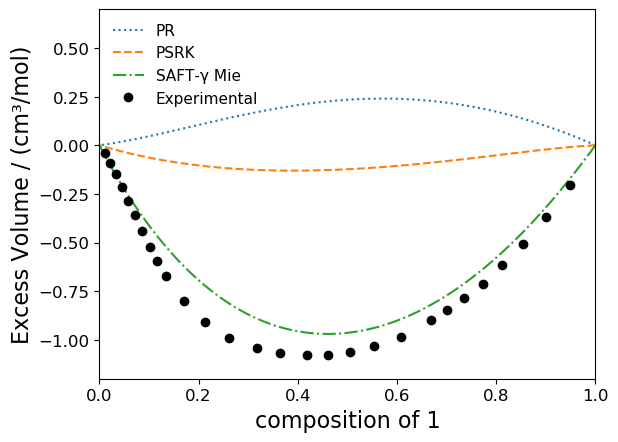

In [539]:
plt.plot(1 .-x,V_E[1].*1e6,label="PR",linestyle=":")
plt.plot(1 .-x,V_E[2].*1e6,label="PSRK",linestyle="--")
plt.plot(1 .-x,V_E[3].*1e6,label="SAFT-γ Mie",linestyle="-.")
plt.plot(Exp[:,1],Exp[:,3].*1e6,linestyle="",marker="o",color="k",label="Experimental") 
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Excess Volume / (cm³/mol)",fontsize=16)
plt.ylim([-1.2,0.7])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="upper left",frameon=false,fontsize=11) 
plt.savefig("excess_volume_EtOH_water.pdf",bbox_inches="tight")

### Figure H
Enthalpy of mixing water+acetone

In [540]:
model1 = NRTL(["water","acetone"])
model2 = VTPR(["water","acetone"])
model3 = PCSAFT(["water","acetone"])
model4 = SAFTgammaMie(["water","acetone"])
models = [model1,model2,model3,model4]

4-element Vector{EoSModel}:
 NRTL{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}("water", "acetone")
 PR{BasicIdeal, TwuAlpha, RackettTranslation, VTPRRule{VTPRUNIFAC{PR{BasicIdeal, PRAlpha, NoTranslation, vdW1fRule}}}}("water", "acetone")
 PCSAFT{BasicIdeal}("water", "acetone")
 SAFTgammaMie{BasicIdeal, SAFTVRMie{BasicIdeal}}("water", "acetone")

In [543]:
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
H_E = []
for i ∈ 1:4
append!(H_E,[mixing.(models[i],1.013e6,278.15,X,enthalpy)])
end

In [542]:
Exp = [0.0019	-24
0.0061	-73
0.0104	-122
0.0147	-168
0.019	-213
0.0255	-276
0.0342	-353
0.0431	-424
0.0522	-487
0.0613	-544
0.0704	-592
0.0797	-636
0.0887	-672
0.1024	-715
0.1215	-762
0.1414	-792
0.1618	-810
0.182	-817
0.2025	-815
0.2233	-805
0.244	-788
0.2597	-771
0.2654	-753
0.2707	-758
0.2817	-731
0.2995	-705
0.3192	-673
0.3396	-638
0.362	-596
0.3879	-547
0.4167	-489
0.4495	-421
0.4868	-342
0.5294	-251
0.5715	-161
0.6121	-77
0.6504	-1
0.6844	61
0.7212	122
0.7627	178
0.8087	221
0.8486	238
0.8857	230
0.9225	195
0.9532	140
0.9841	56];

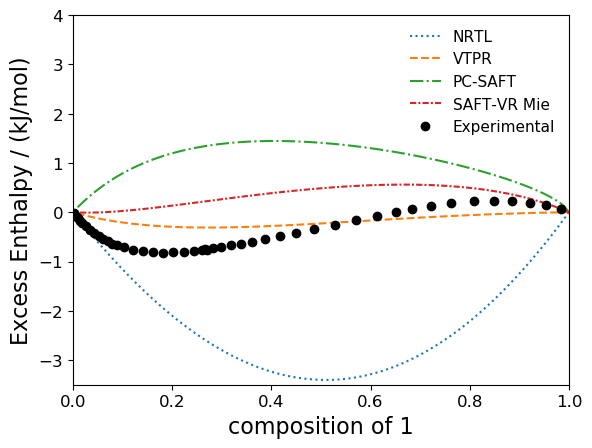

In [544]:
plt.plot(1 .-x,H_E[1]./1e3,label="NRTL",linestyle=":")
plt.plot(1 .-x,H_E[2]./1e3,label="VTPR",linestyle="--")
plt.plot(1 .-x,H_E[3]./1e3,label="PC-SAFT",linestyle="-.")
plt.plot(1 .-x,H_E[4]./1e3,label="SAFT-VR Mie",linestyle=(0, (3, 1, 1, 1)))
plt.plot(Exp[:,1],Exp[:,2]./1e3,linestyle="",marker="o",color="k",label="Experimental") 
plt.xlabel("composition of 1",fontsize=16)
plt.ylabel("Excess Enthalpy / (kJ/mol)",fontsize=16)
plt.ylim([-3.5,4])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="bottom left",frameon=false,fontsize=11) 
plt.savefig("excess_enthalpy_AcT_water.pdf",bbox_inches="tight")